<a href="https://colab.research.google.com/github/srithik2002/My-Sample-Repo/blob/main/Malware_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_recall_curve, recall_score, roc_curve, precision_score
import warnings
from sklearn.preprocessing import LabelEncoder


In [49]:
data = pd.read_csv("/content/drebin215dataset5560malware9476benign.csv")
data

<ipython-input-49-47ff944dcb9c>:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drebin215dataset5560malware9476benign.csv")


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


In [50]:
classes,count = np.unique(data['class'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
data = data.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to NaN and use dropna() to remove them
data=data.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(data.isna().sum())))
data.dropna(inplace=True)
for c in data.columns:
    data[c] = pd.to_numeric(data[c])
data

[0 1] ['B' 'S']
Total missing values :  5


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [46]:
df.dropna(inplace=True)

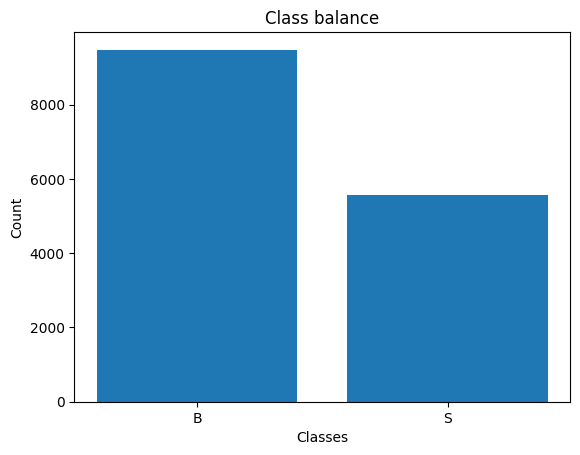

In [94]:
plt.bar(classes,count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [51]:
X = data.drop('class', axis=1).values  # Features
y = data['class'].values  # Target variable

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [4]:
lb = LabelEncoder()
df['class'] = lb.fit_transform(df['class'])
df.isna().sum()

transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
type(y_train)

numpy.ndarray

In [41]:
type(X_train)

numpy.ndarray

In [77]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                2160      
                                                                 
 dropout_13 (Dropout)        (None, 10)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2171 (8.48 KB)
Trainable params: 2171 (8.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
batch_size = 32
epochs = 20

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

y_pred = (model.predict(X_test) > 0.5).astype(np.int32)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Epoch 1/20
339/339 [==============================] - 2s 3ms/step - loss: 0.2878 - accuracy: 0.8853 - val_loss: 0.1384 - val_accuracy: 0.9568
Epoch 2/20
339/339 [==============================] - 1s 2ms/step - loss: 0.1413 - accuracy: 0.9584 - val_loss: 0.1024 - val_accuracy: 0.9676
Epoch 3/20
339/339 [==============================] - 1s 3ms/step - loss: 0.1092 - accuracy: 0.9643 - val_loss: 0.0926 - val_accuracy: 0.9692
Epoch 4/20
339/339 [==============================] - 1s 2ms/step - loss: 0.0903 - accuracy: 0.9719 - val_loss: 0.0875 - val_accuracy: 0.9684
Epoch 5/20
339/339 [==============================] - 1s 3ms/step - loss: 0.0859 - accuracy: 0.9708 - val_loss: 0.0843 - val_accuracy: 0.9717
Epoch 6/20
339/339 [==============================] - 1s 3ms/step - loss: 0.0752 - accuracy: 0.9759 - val_loss: 0.0822 - val_accuracy: 0.9717
Epoch 7/20
339/339 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9742 - val_loss: 0.0820 - val_accuracy: 0.9726
Epoch 

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


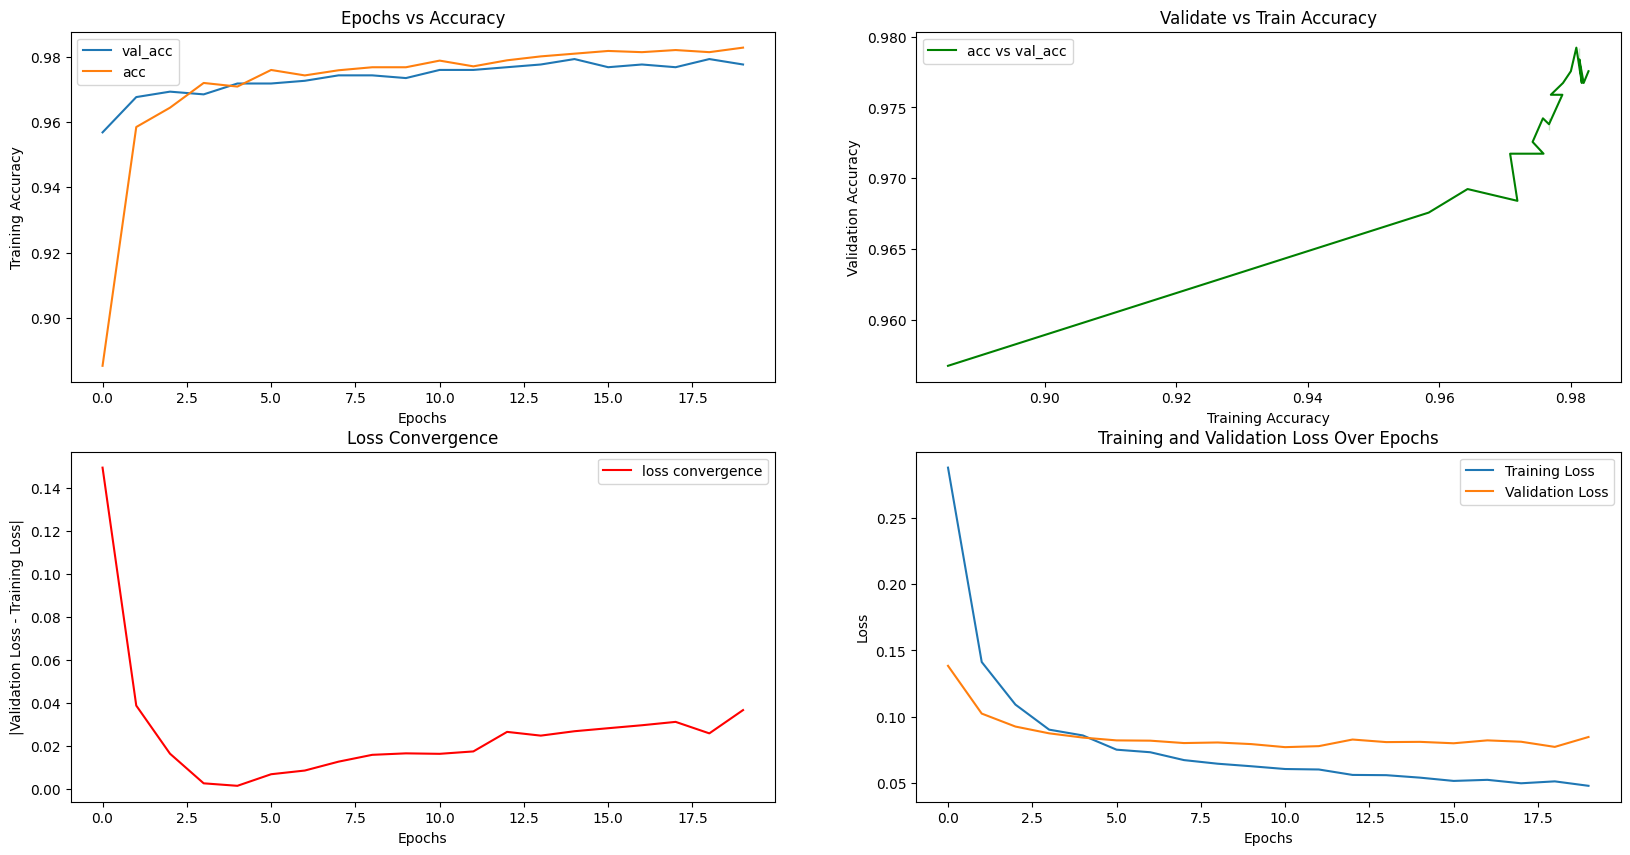

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_training_history(history):
    h1 = history.history

    plt.figure(figsize=(20, 10))

    # Subplot 1: Epochs vs Accuracy
    plt.subplot(2, 2, 1)
    ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
    ax.set(xlabel='Epochs', ylabel='Validation Accuracy')
    ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
    ax.set(xlabel='Epochs', ylabel='Training Accuracy')
    plt.title("Epochs vs Accuracy")

    # Subplot 2: Validate vs Train Accuracy
    plt.subplot(2, 2, 2)
    ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)
    ax.set(xlabel='Training Accuracy', ylabel='Validation Accuracy')
    plt.title("Validate vs Train Accuracy")

    # Subplot 3: Loss Convergence
    plt.subplot(2, 2, 3)
    pdtmp1 = abs(pd.DataFrame(h1['loss']) - pd.DataFrame(h1['val_loss']))
    pdtmp1.fillna(0, inplace=True)
    ax = sns.lineplot(y=pdtmp1[0], x=range(0, len(h1['val_loss']), 1), label='loss convergence', color='red')
    ax.set(xlabel='Epochs', ylabel='|Validation Loss - Training Loss|')
    plt.title('Loss Convergence')

    # Subplot 4: Training and Validation Loss Over Epochs
    plt.subplot(2, 2, 4)
    plt.plot(h1['loss'], label='Training Loss')
    plt.plot(h1['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Assuming 'history' is the object returned by model.fit()
plot_training_history(history)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               27648     
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dropout_29 (Dropout)        (None, 32)                0         
                                                                 
 dense_45 (Dense)            (None, 1)               

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


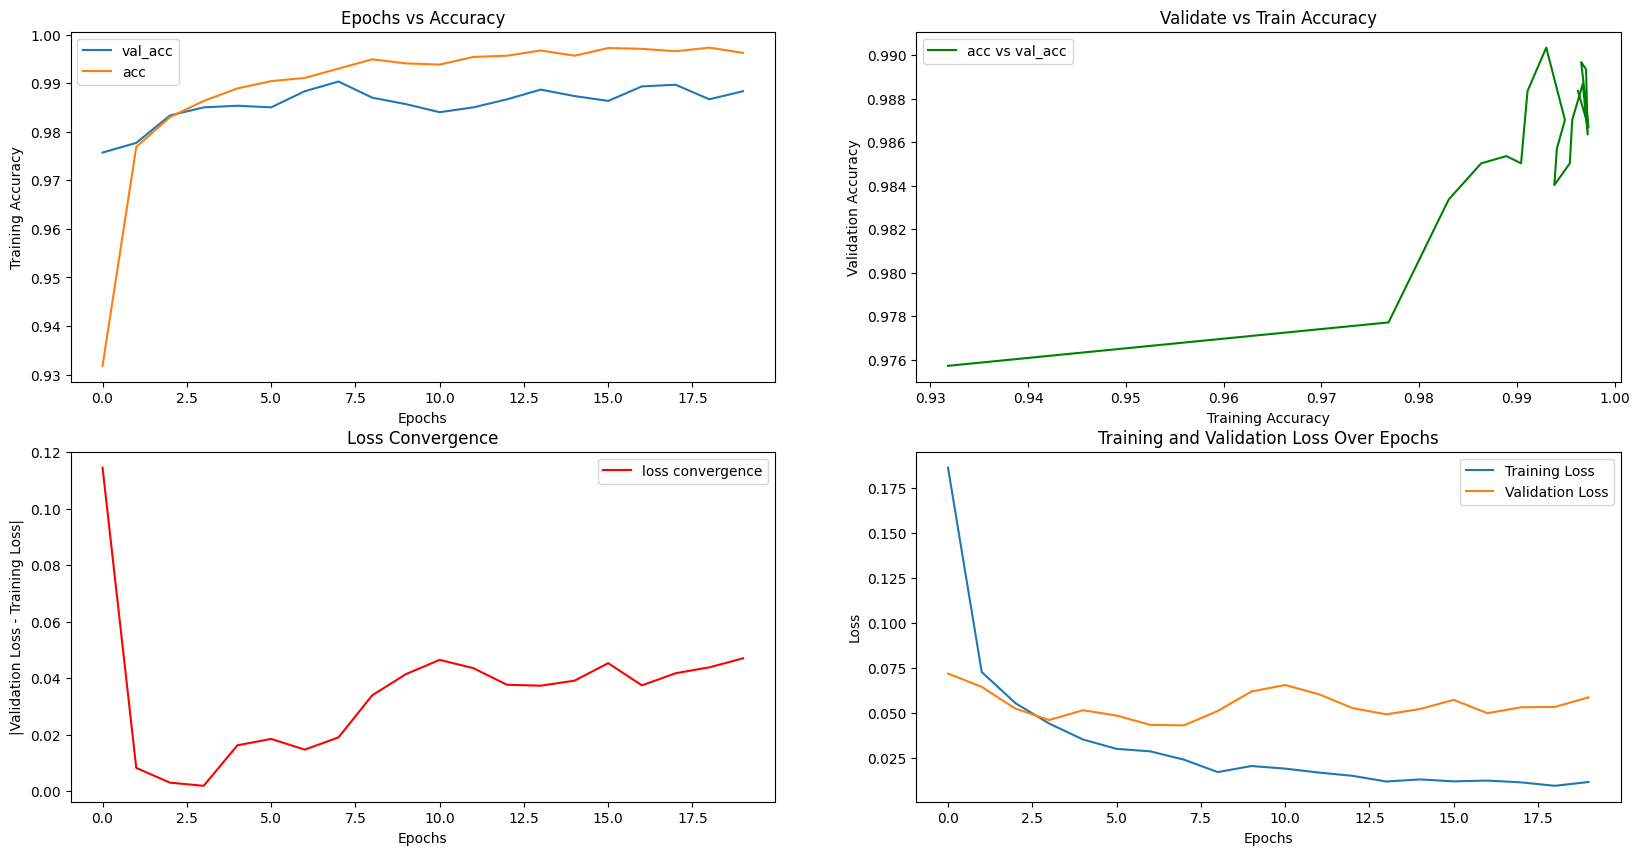

In [96]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
batch_size = 32
epochs = 20
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test,y_test))
y_pred = (model.predict(X_test) > 0.5).astype(np.int32)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
plot_training_history(history)

In [97]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

Code with optimizer as ADAM

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 64)                13824     
                                                                 
 dropout_34 (Dropout)        (None, 64)                0         
                                                                 
 dense_59 (Dense)            (None, 32)                2080      
                                                                 
 dropout_35 (Dropout)        (None, 32)                0         
                                                                 
 dense_60 (Dense)            (None, 1)                 33        
                                                                 
Total params: 15937 (62.25 KB)
Trainable params: 15937 (62.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
376/37

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


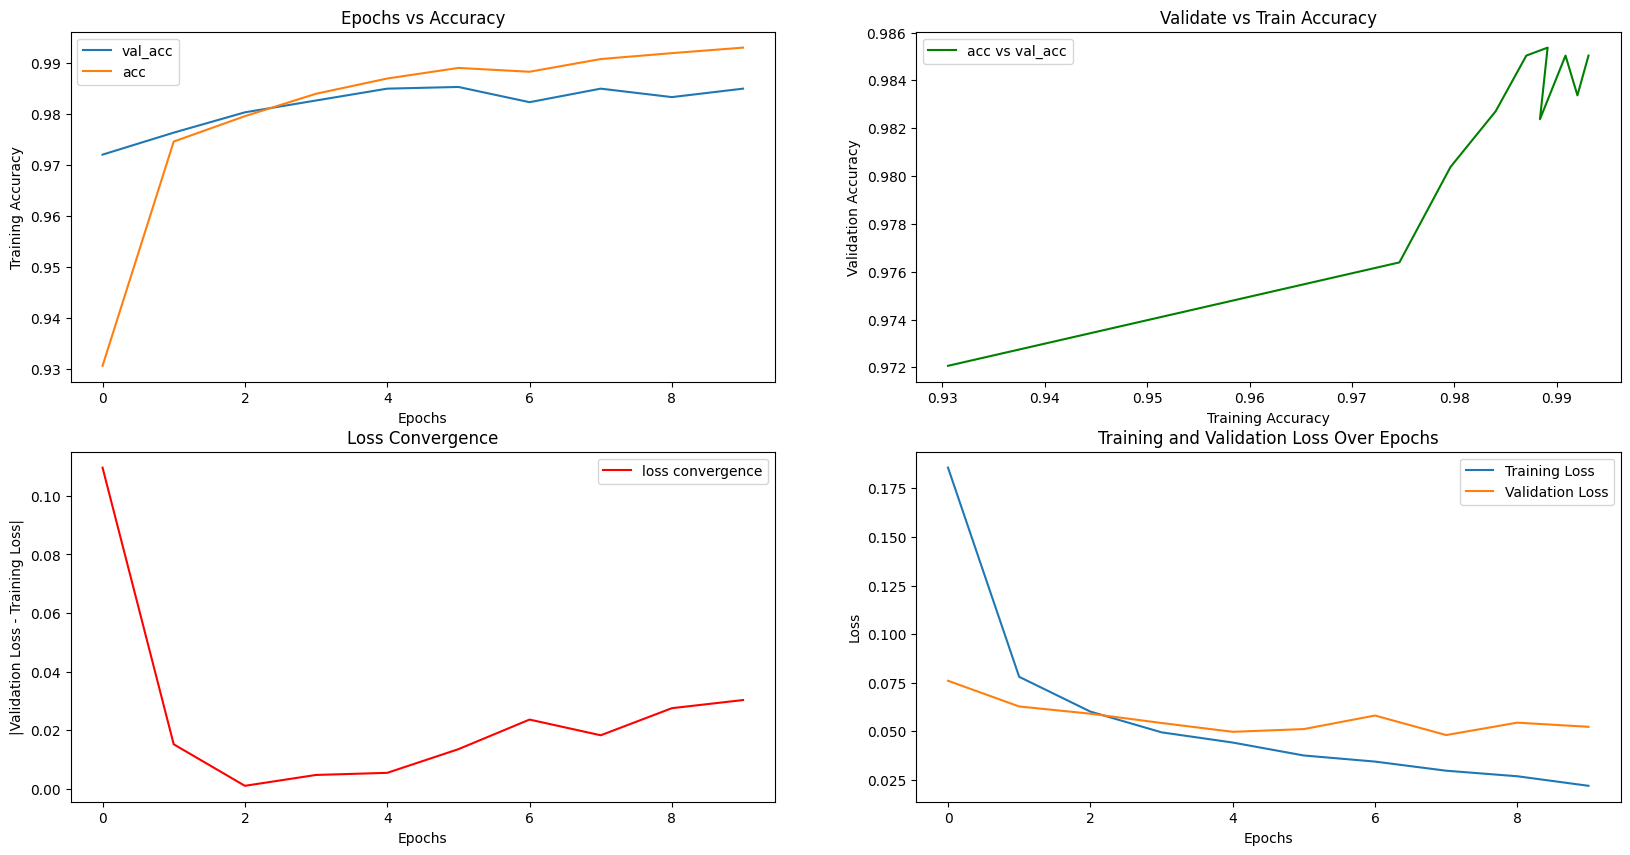

In [106]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
batch_size = 32
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test,y_test))
y_pred = (model.predict(X_test) > 0.5).astype(np.int32)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
plot_training_history(history)

Code with Optimizer as SGD

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 32)                6912      
                                                                 
 dropout_48 (Dropout)        (None, 32)                0         
                                                                 
 dense_80 (Dense)            (None, 32)                1056      
                                                                 
 dropout_49 (Dropout)        (None, 32)                0         
                                                                 
 dense_81 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8001 (31.25 KB)
Trainable params: 8001 (31.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
188/188 

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


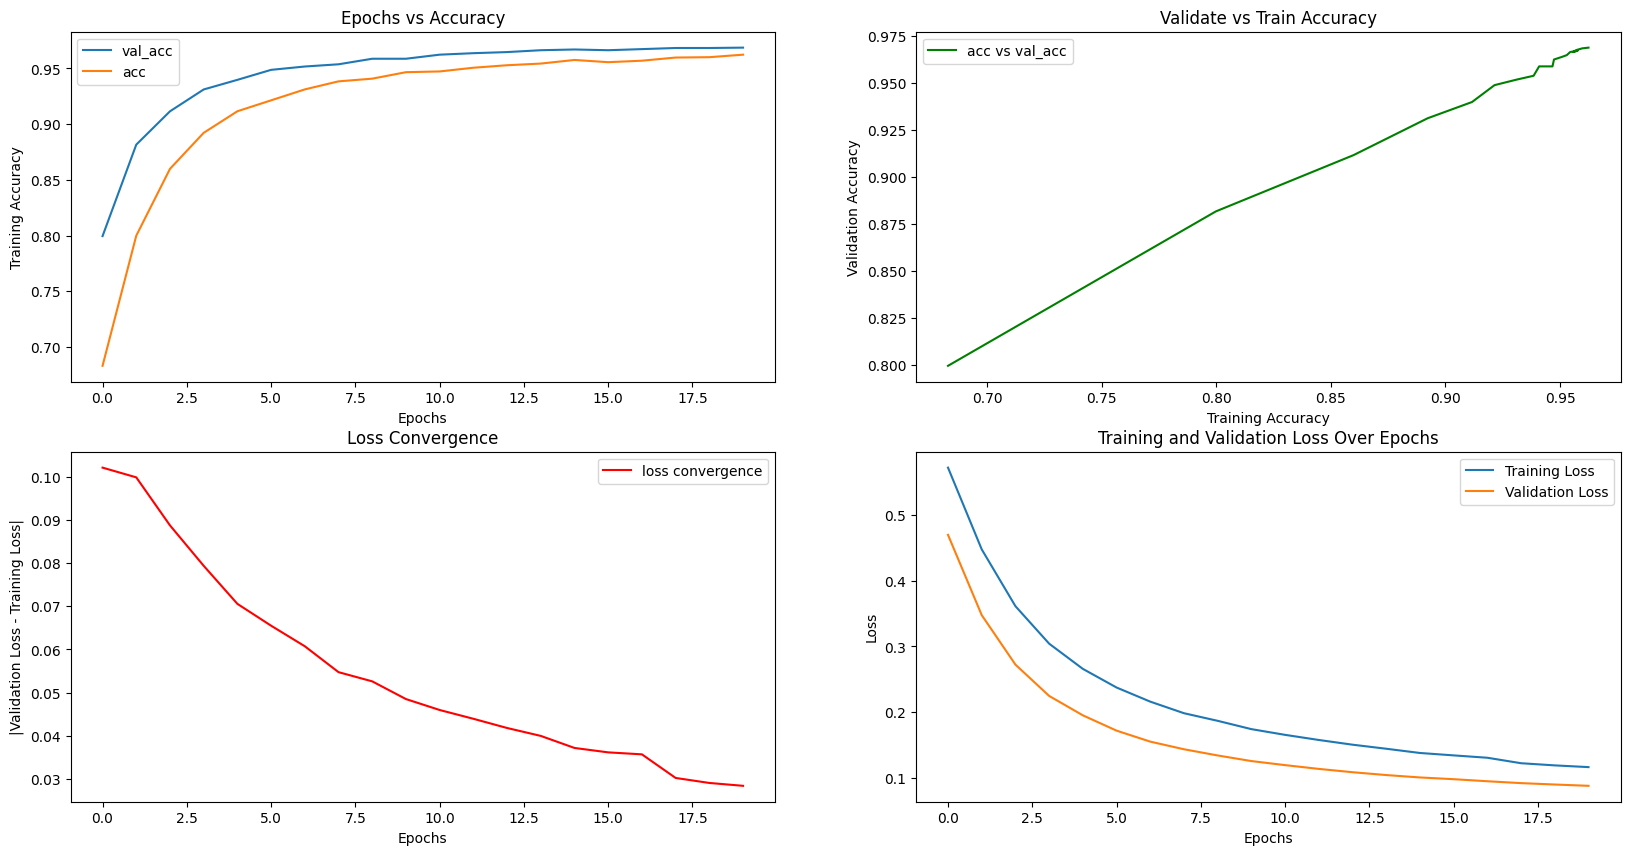

In [113]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
batch_size = 32
epochs = 20
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test,y_test))
y_pred = (model.predict(X_test) > 0.5).astype(np.int32)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
plot_training_history(history)

In [116]:
def build_model(n_neurons, n_layers):
    model = Sequential()
    model.add(Dense(n_neurons, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(n_layers):
        model.add(Dense(n_neurons, activation='relu'))
        model.add(Dropout(0.3))  # Adding dropout for regularization
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Neurons,layers : 10,0
Epoch 1/20
376/376 [==============================] - 5s 11ms/step - loss: 0.4166 - accuracy: 0.8338 - val_loss: 0.2721 - val_accuracy: 0.9155
Epoch 2/20
376/376 [==============================] - 1s 3ms/step - loss: 0.2341 - accuracy: 0.9296 - val_loss: 0.1953 - val_accuracy: 0.9395
Epoch 3/20
376/376 [==============================] - 1s 3ms/step - loss: 0.1830 - accuracy: 0.9471 - val_loss: 0.1616 - val_accuracy: 0.9541
Epoch 4/20
376/376 [==============================] - 1s 3ms/step - loss: 0.1563 - accuracy: 0.9563 - val_loss: 0.1422 - val_accuracy: 0.9578
Epoch 5/20
376/376 [==============================] - 1s 3ms/step - loss: 0.1388 - accuracy: 0.9606 - val_loss: 0.1291 - val_accuracy: 0.9628
Epoch 6/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1267 - accuracy: 0.9632 - val_loss: 0.1198 - val_accuracy: 0.9644
Epoch 7/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1176 - accuracy: 0.9647 - val_loss: 0.1130 - val_

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


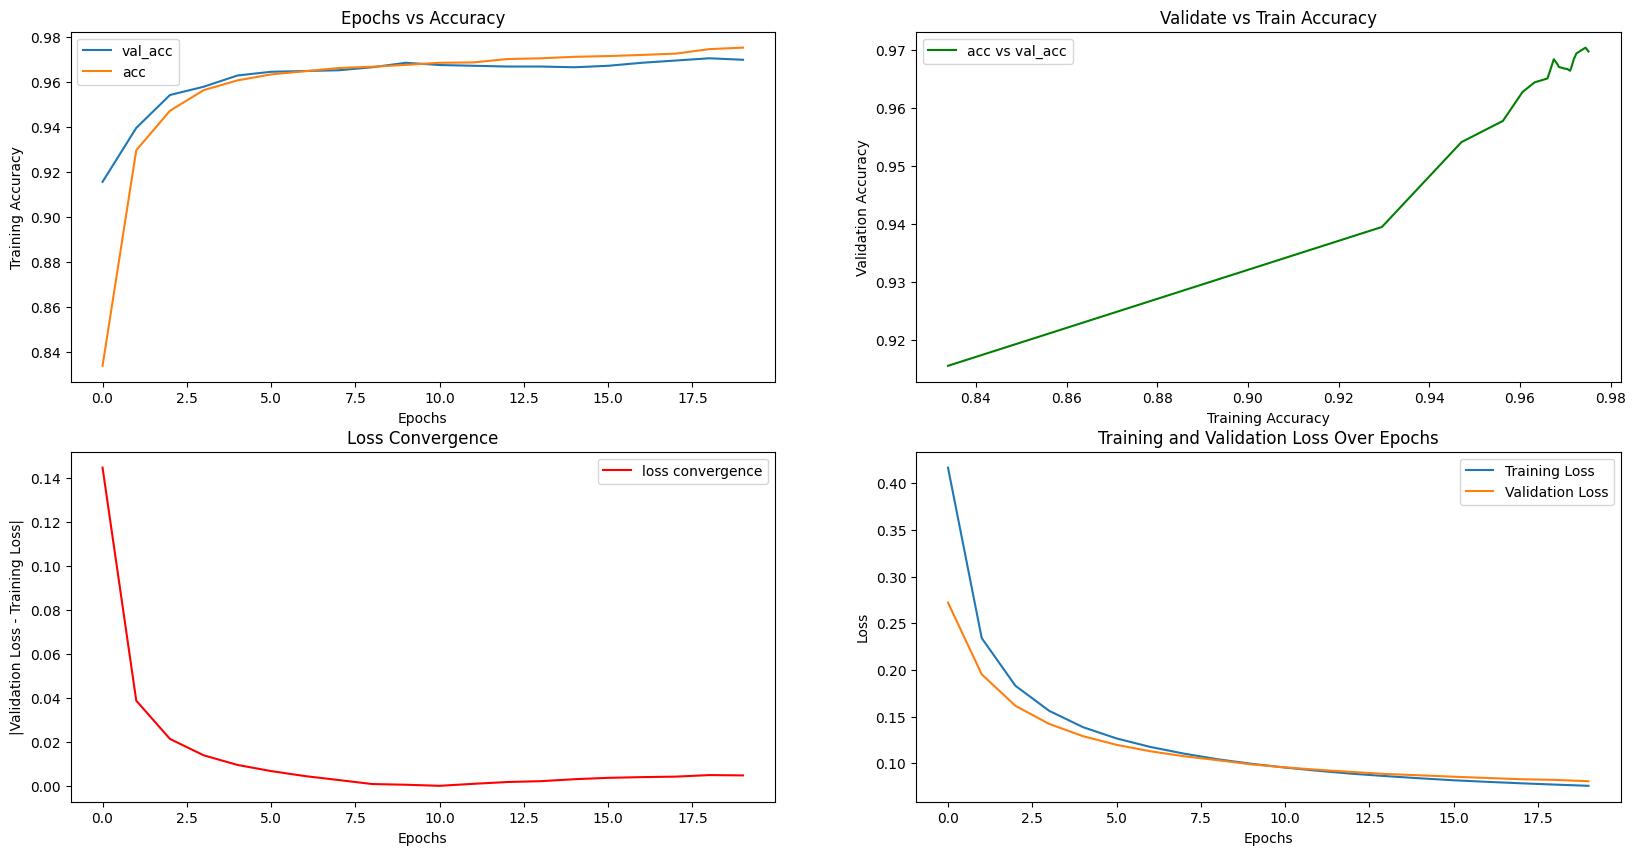

Neurons,layers : 10,1
Epoch 1/20
376/376 [==============================] - 2s 4ms/step - loss: 0.4753 - accuracy: 0.7660 - val_loss: 0.3182 - val_accuracy: 0.9332
Epoch 2/20
376/376 [==============================] - 1s 4ms/step - loss: 0.2919 - accuracy: 0.8969 - val_loss: 0.1997 - val_accuracy: 0.9544
Epoch 3/20
376/376 [==============================] - 2s 4ms/step - loss: 0.2247 - accuracy: 0.9296 - val_loss: 0.1511 - val_accuracy: 0.9601
Epoch 4/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1869 - accuracy: 0.9434 - val_loss: 0.1253 - val_accuracy: 0.9638
Epoch 5/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1619 - accuracy: 0.9523 - val_loss: 0.1098 - val_accuracy: 0.9684
Epoch 6/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1384 - accuracy: 0.9572 - val_loss: 0.0995 - val_accuracy: 0.9677
Epoch 7/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1308 - accuracy: 0.9593 - val_loss: 0.0927 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


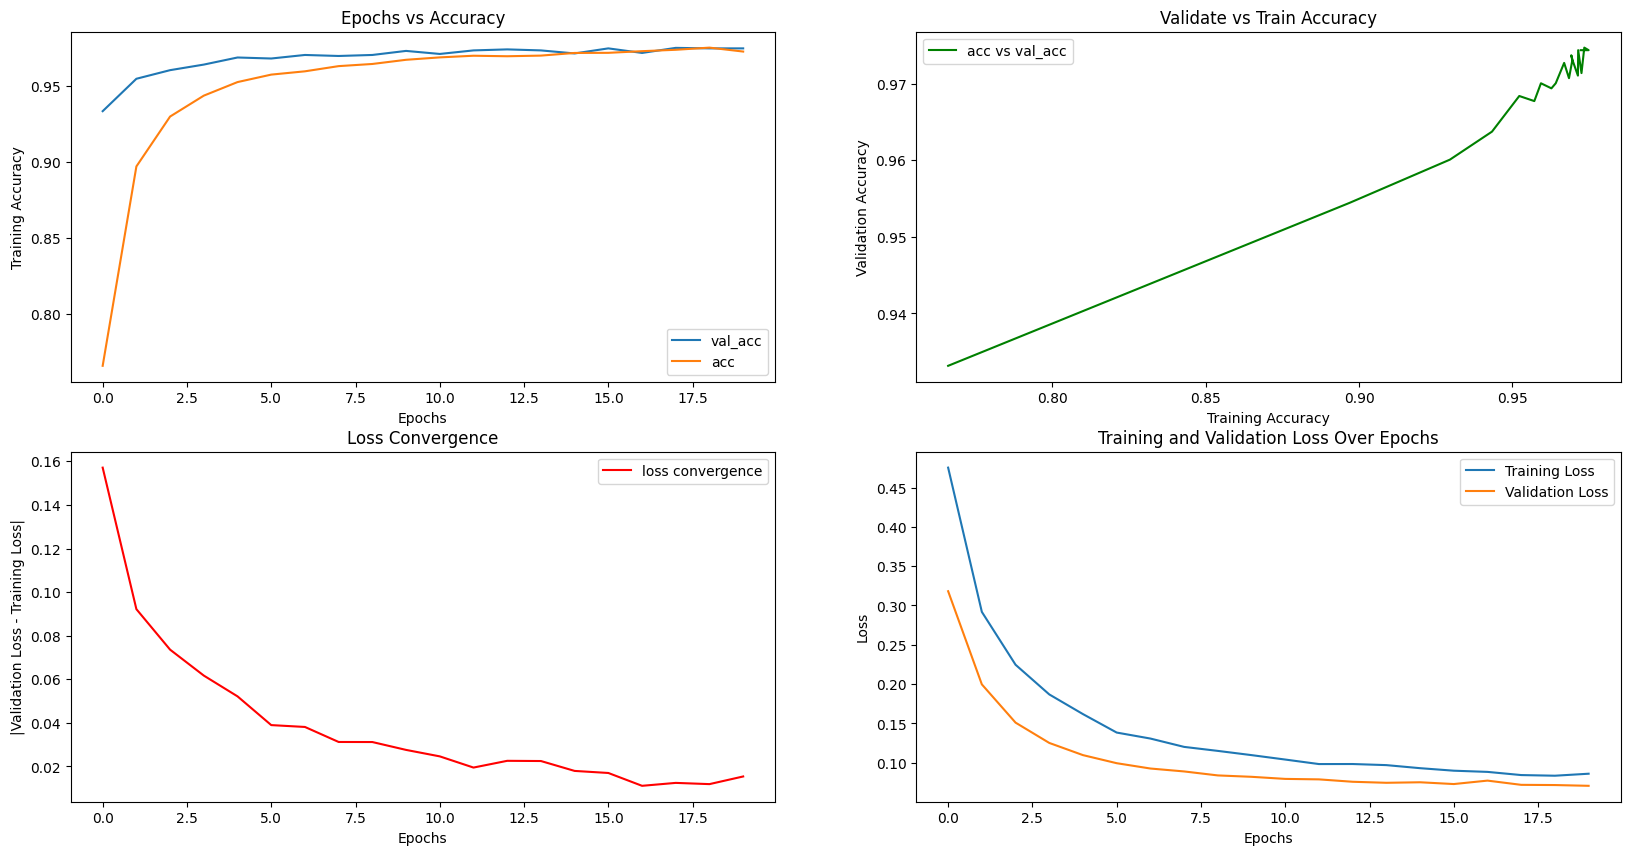

Neurons,layers : 15,0
Epoch 1/20
376/376 [==============================] - 2s 4ms/step - loss: 0.4038 - accuracy: 0.8594 - val_loss: 0.2654 - val_accuracy: 0.9232
Epoch 2/20
376/376 [==============================] - 1s 4ms/step - loss: 0.2303 - accuracy: 0.9316 - val_loss: 0.1945 - val_accuracy: 0.9415
Epoch 3/20
376/376 [==============================] - 1s 3ms/step - loss: 0.1829 - accuracy: 0.9451 - val_loss: 0.1622 - val_accuracy: 0.9524
Epoch 4/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1568 - accuracy: 0.9535 - val_loss: 0.1430 - val_accuracy: 0.9538
Epoch 5/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1394 - accuracy: 0.9582 - val_loss: 0.1296 - val_accuracy: 0.9618
Epoch 6/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1270 - accuracy: 0.9607 - val_loss: 0.1202 - val_accuracy: 0.9641
Epoch 7/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1178 - accuracy: 0.9630 - val_loss: 0.1128 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


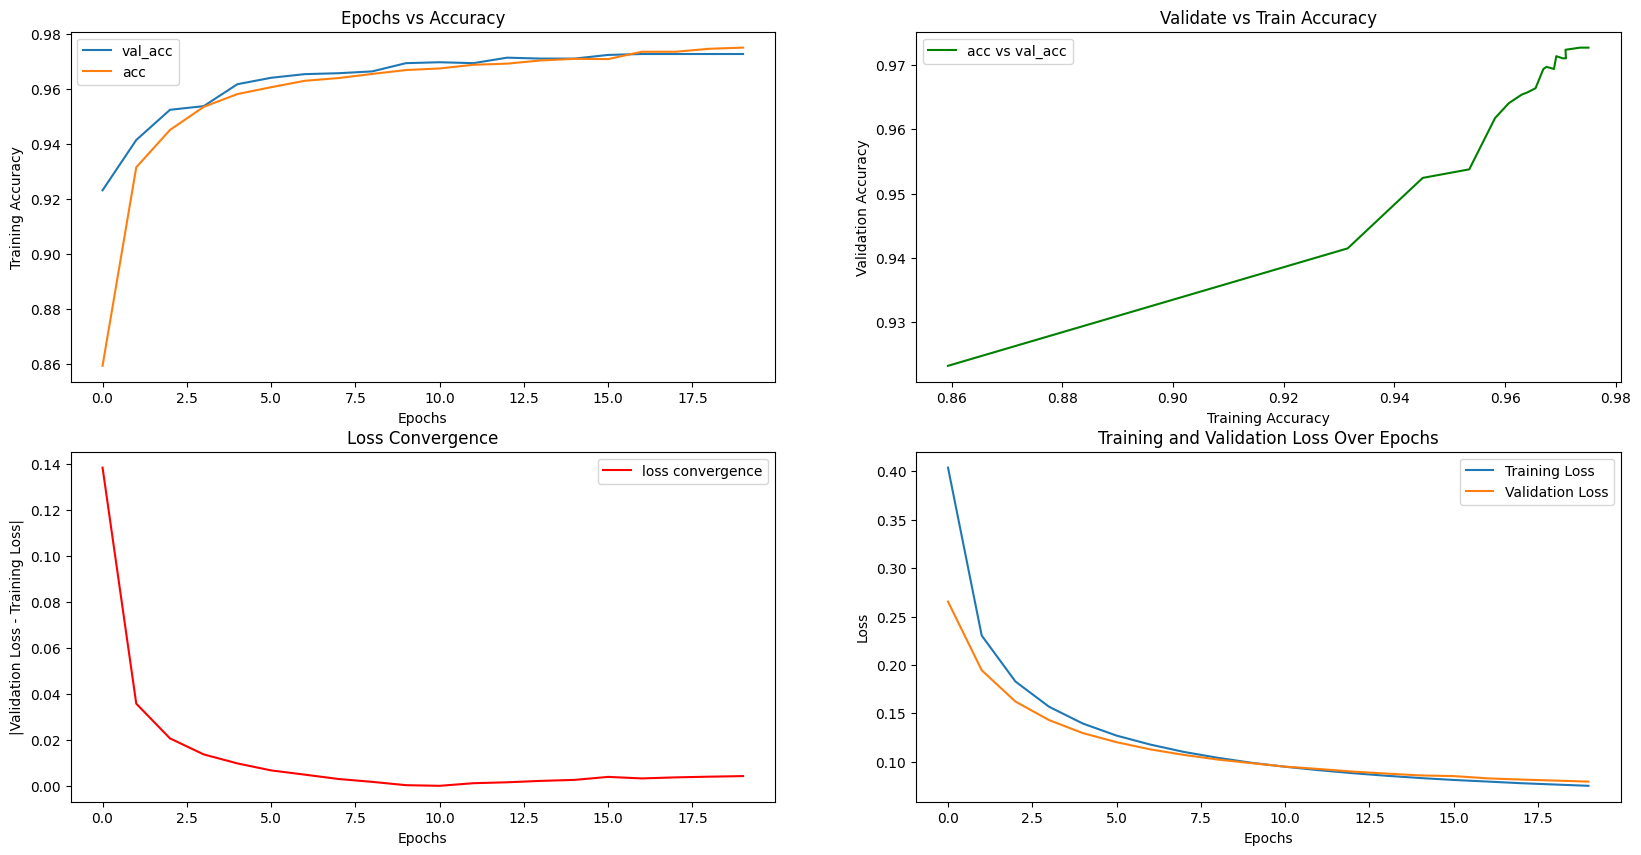

Neurons,layers : 15,1
Epoch 1/20
376/376 [==============================] - 3s 6ms/step - loss: 0.4829 - accuracy: 0.7646 - val_loss: 0.3129 - val_accuracy: 0.9235
Epoch 2/20
376/376 [==============================] - 2s 4ms/step - loss: 0.2639 - accuracy: 0.9192 - val_loss: 0.1824 - val_accuracy: 0.9418
Epoch 3/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1952 - accuracy: 0.9415 - val_loss: 0.1417 - val_accuracy: 0.9564
Epoch 4/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1616 - accuracy: 0.9509 - val_loss: 0.1196 - val_accuracy: 0.9624
Epoch 5/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1426 - accuracy: 0.9573 - val_loss: 0.1075 - val_accuracy: 0.9671
Epoch 6/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1303 - accuracy: 0.9588 - val_loss: 0.1003 - val_accuracy: 0.9661
Epoch 7/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1184 - accuracy: 0.9620 - val_loss: 0.0949 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


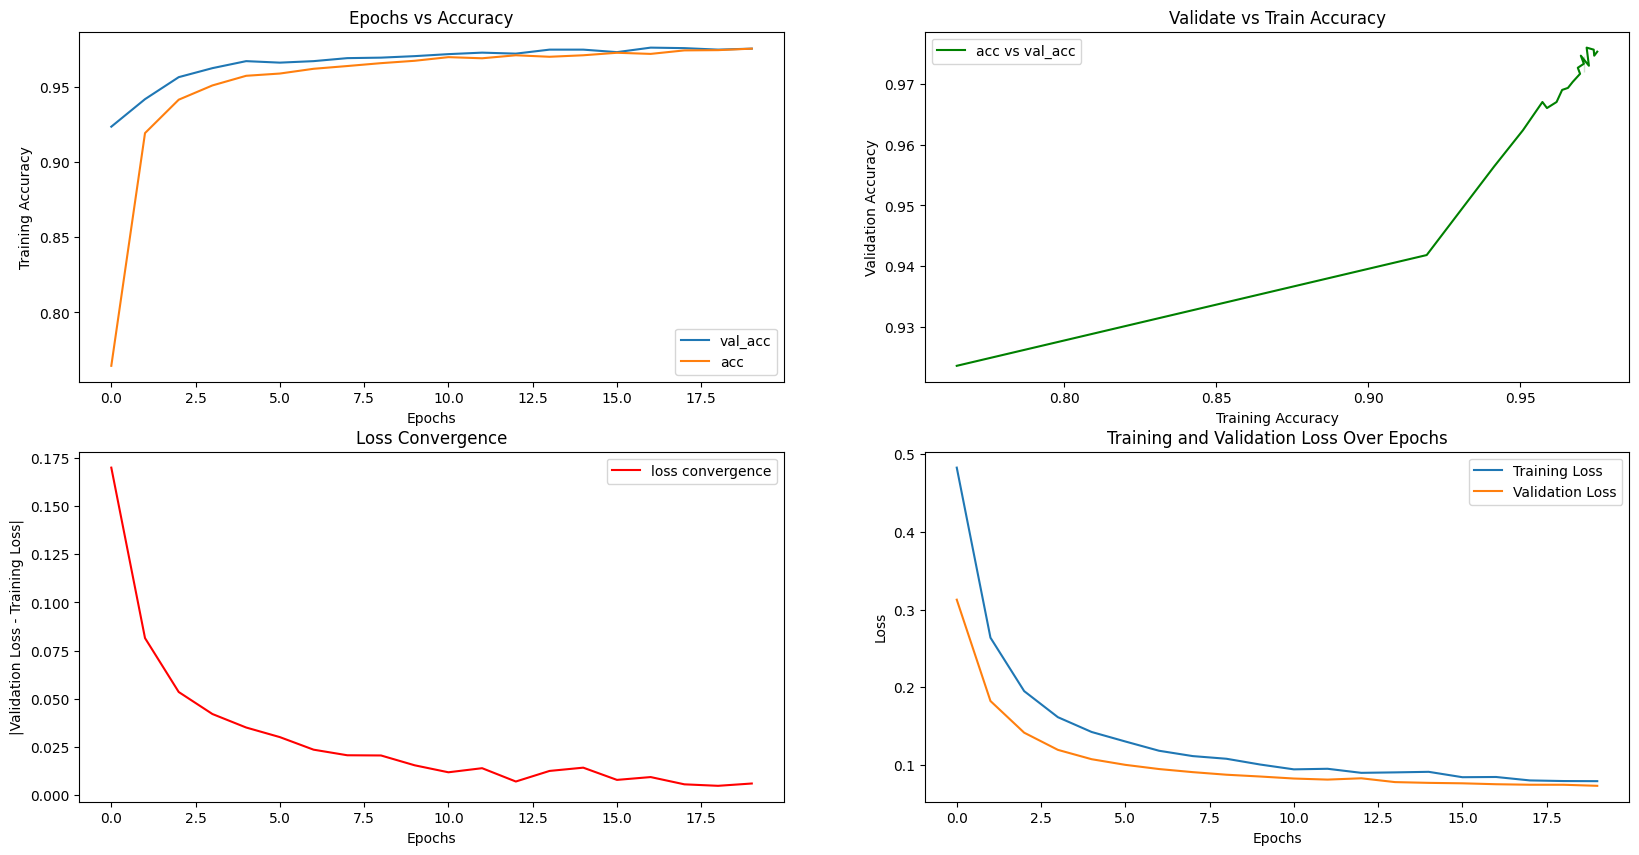

Neurons,layers : 20,0
Epoch 1/20
376/376 [==============================] - 2s 5ms/step - loss: 0.3668 - accuracy: 0.8741 - val_loss: 0.2543 - val_accuracy: 0.9322
Epoch 2/20
376/376 [==============================] - 1s 4ms/step - loss: 0.2171 - accuracy: 0.9402 - val_loss: 0.1856 - val_accuracy: 0.9498
Epoch 3/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1710 - accuracy: 0.9543 - val_loss: 0.1546 - val_accuracy: 0.9561
Epoch 4/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1462 - accuracy: 0.9587 - val_loss: 0.1364 - val_accuracy: 0.9594
Epoch 5/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1303 - accuracy: 0.9626 - val_loss: 0.1240 - val_accuracy: 0.9631
Epoch 6/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1190 - accuracy: 0.9646 - val_loss: 0.1154 - val_accuracy: 0.9641
Epoch 7/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1105 - accuracy: 0.9649 - val_loss: 0.1091 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


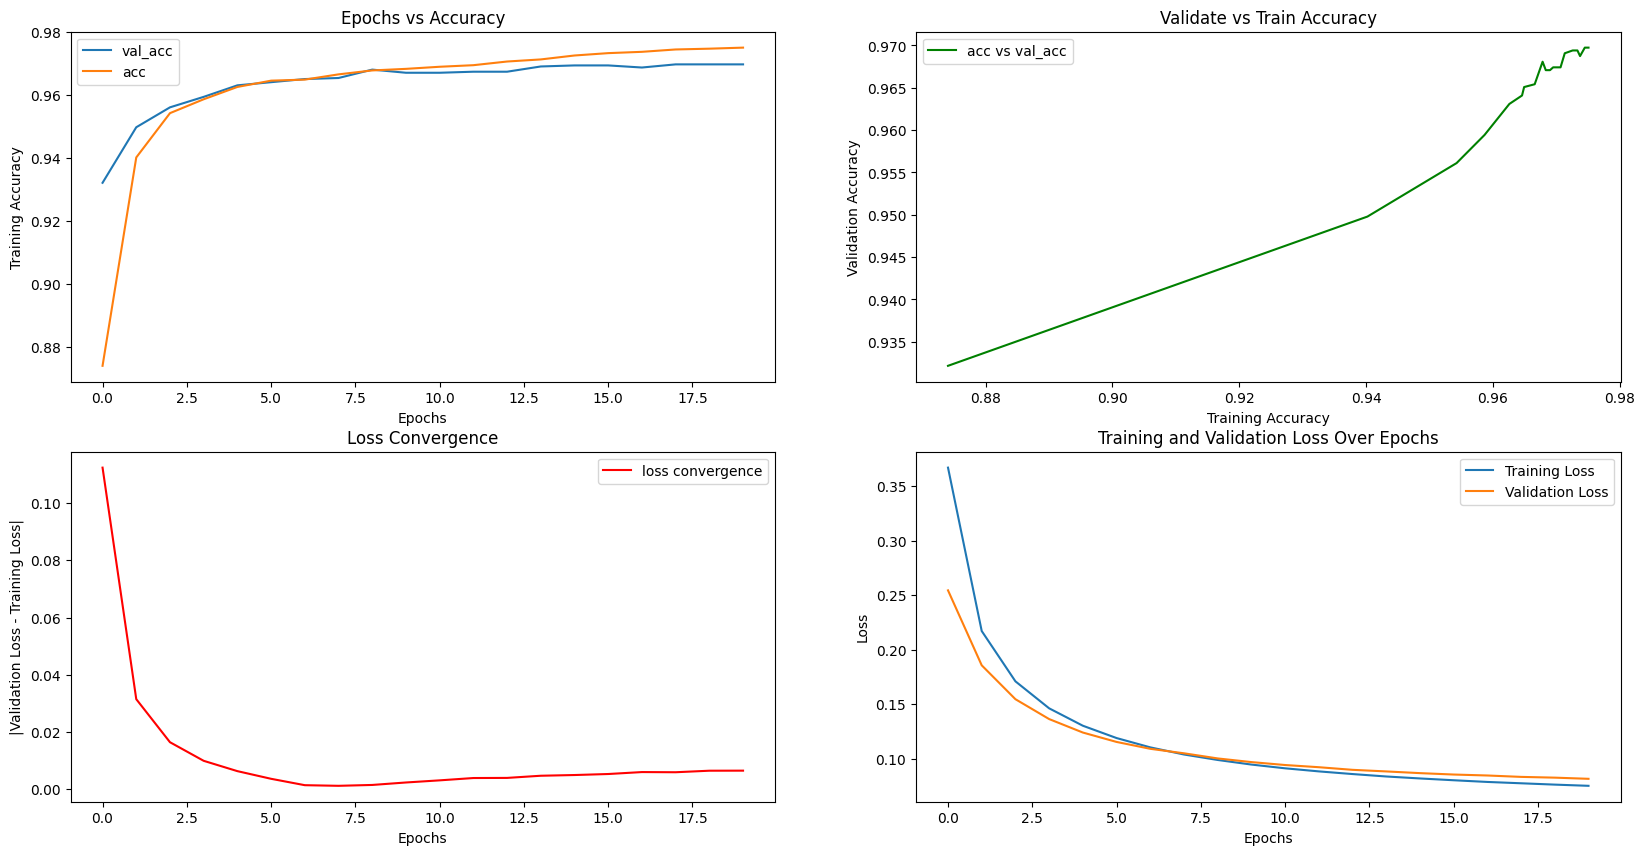

Neurons,layers : 20,1
Epoch 1/20
376/376 [==============================] - 2s 5ms/step - loss: 0.4445 - accuracy: 0.8030 - val_loss: 0.2690 - val_accuracy: 0.9322
Epoch 2/20
376/376 [==============================] - 2s 6ms/step - loss: 0.2378 - accuracy: 0.9279 - val_loss: 0.1689 - val_accuracy: 0.9475
Epoch 3/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1798 - accuracy: 0.9455 - val_loss: 0.1349 - val_accuracy: 0.9534
Epoch 4/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1459 - accuracy: 0.9547 - val_loss: 0.1160 - val_accuracy: 0.9581
Epoch 5/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1292 - accuracy: 0.9591 - val_loss: 0.1084 - val_accuracy: 0.9624
Epoch 6/20
376/376 [==============================] - 2s 6ms/step - loss: 0.1152 - accuracy: 0.9622 - val_loss: 0.0968 - val_accuracy: 0.9644
Epoch 7/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1075 - accuracy: 0.9660 - val_loss: 0.0909 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


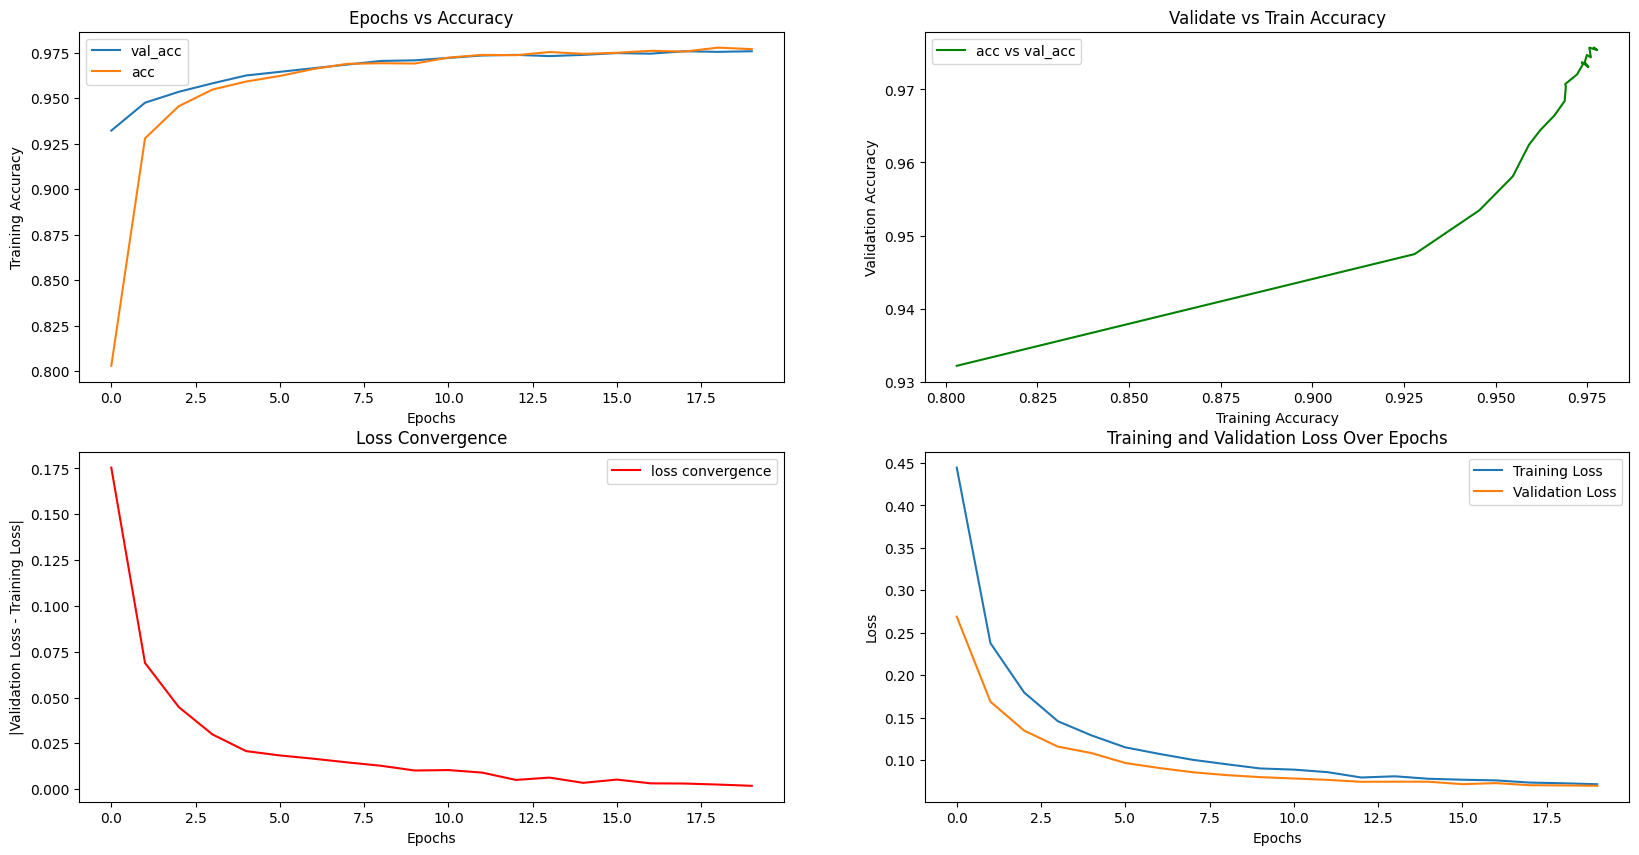

Neurons,layers : 25,0
Epoch 1/20
376/376 [==============================] - 3s 6ms/step - loss: 0.4219 - accuracy: 0.8320 - val_loss: 0.2840 - val_accuracy: 0.9075
Epoch 2/20
376/376 [==============================] - 2s 4ms/step - loss: 0.2457 - accuracy: 0.9203 - val_loss: 0.2046 - val_accuracy: 0.9338
Epoch 3/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1914 - accuracy: 0.9380 - val_loss: 0.1683 - val_accuracy: 0.9481
Epoch 4/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1616 - accuracy: 0.9501 - val_loss: 0.1465 - val_accuracy: 0.9518
Epoch 5/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1426 - accuracy: 0.9561 - val_loss: 0.1324 - val_accuracy: 0.9574
Epoch 6/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1289 - accuracy: 0.9605 - val_loss: 0.1220 - val_accuracy: 0.9621
Epoch 7/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1188 - accuracy: 0.9629 - val_loss: 0.1143 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


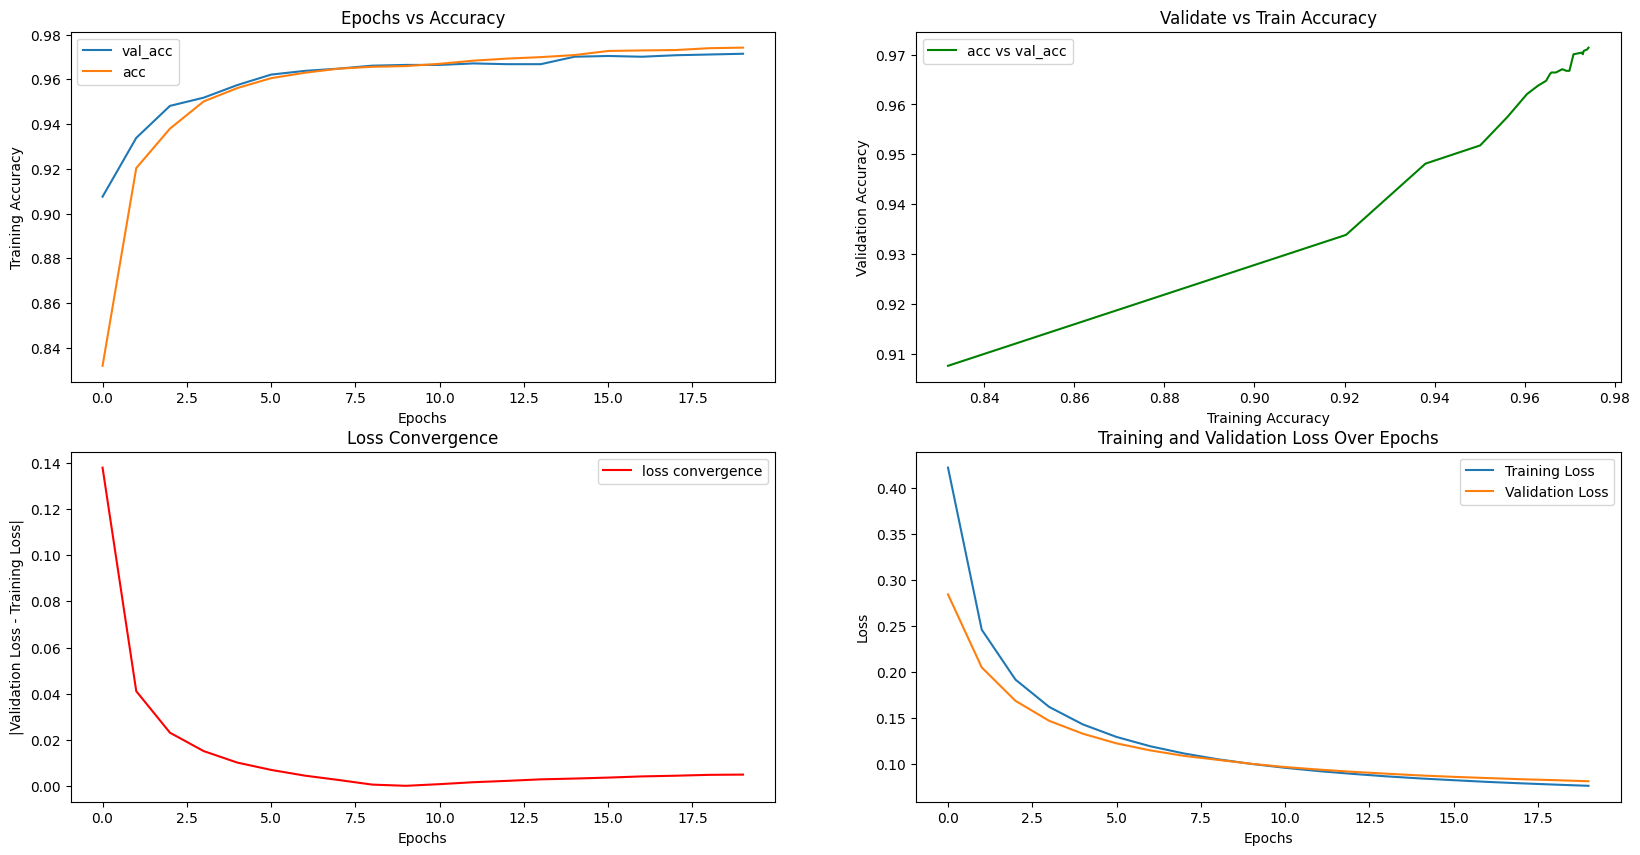

Neurons,layers : 25,1
Epoch 1/20
376/376 [==============================] - 3s 6ms/step - loss: 0.5151 - accuracy: 0.7351 - val_loss: 0.3599 - val_accuracy: 0.8966
Epoch 2/20
376/376 [==============================] - 2s 5ms/step - loss: 0.2864 - accuracy: 0.9088 - val_loss: 0.2056 - val_accuracy: 0.9342
Epoch 3/20
376/376 [==============================] - 2s 4ms/step - loss: 0.2021 - accuracy: 0.9373 - val_loss: 0.1553 - val_accuracy: 0.9514
Epoch 4/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1636 - accuracy: 0.9494 - val_loss: 0.1302 - val_accuracy: 0.9581
Epoch 5/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1406 - accuracy: 0.9555 - val_loss: 0.1164 - val_accuracy: 0.9611
Epoch 6/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1230 - accuracy: 0.9607 - val_loss: 0.1048 - val_accuracy: 0.9661
Epoch 7/20
376/376 [==============================] - 2s 6ms/step - loss: 0.1116 - accuracy: 0.9632 - val_loss: 0.0975 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


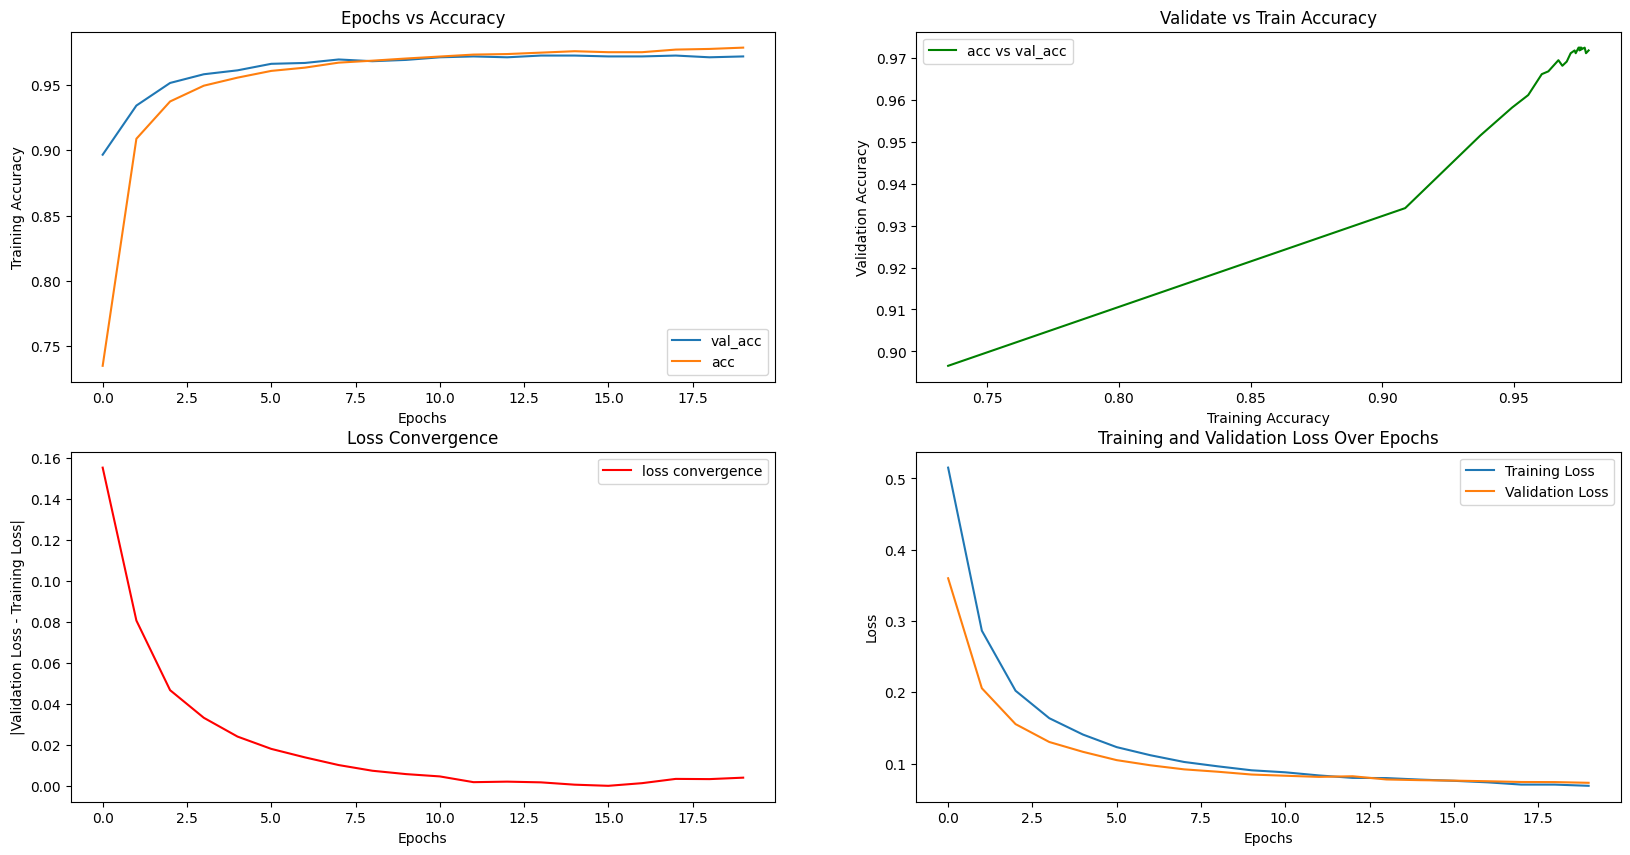

Neurons,layers : 30,0
Epoch 1/20
376/376 [==============================] - 2s 4ms/step - loss: 0.4329 - accuracy: 0.8016 - val_loss: 0.2979 - val_accuracy: 0.9189
Epoch 2/20
376/376 [==============================] - 2s 6ms/step - loss: 0.2518 - accuracy: 0.9277 - val_loss: 0.2104 - val_accuracy: 0.9428
Epoch 3/20
376/376 [==============================] - 2s 6ms/step - loss: 0.1935 - accuracy: 0.9459 - val_loss: 0.1703 - val_accuracy: 0.9524
Epoch 4/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1622 - accuracy: 0.9563 - val_loss: 0.1480 - val_accuracy: 0.9588
Epoch 5/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1425 - accuracy: 0.9597 - val_loss: 0.1325 - val_accuracy: 0.9621
Epoch 6/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1286 - accuracy: 0.9631 - val_loss: 0.1220 - val_accuracy: 0.9647
Epoch 7/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1184 - accuracy: 0.9650 - val_loss: 0.1143 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


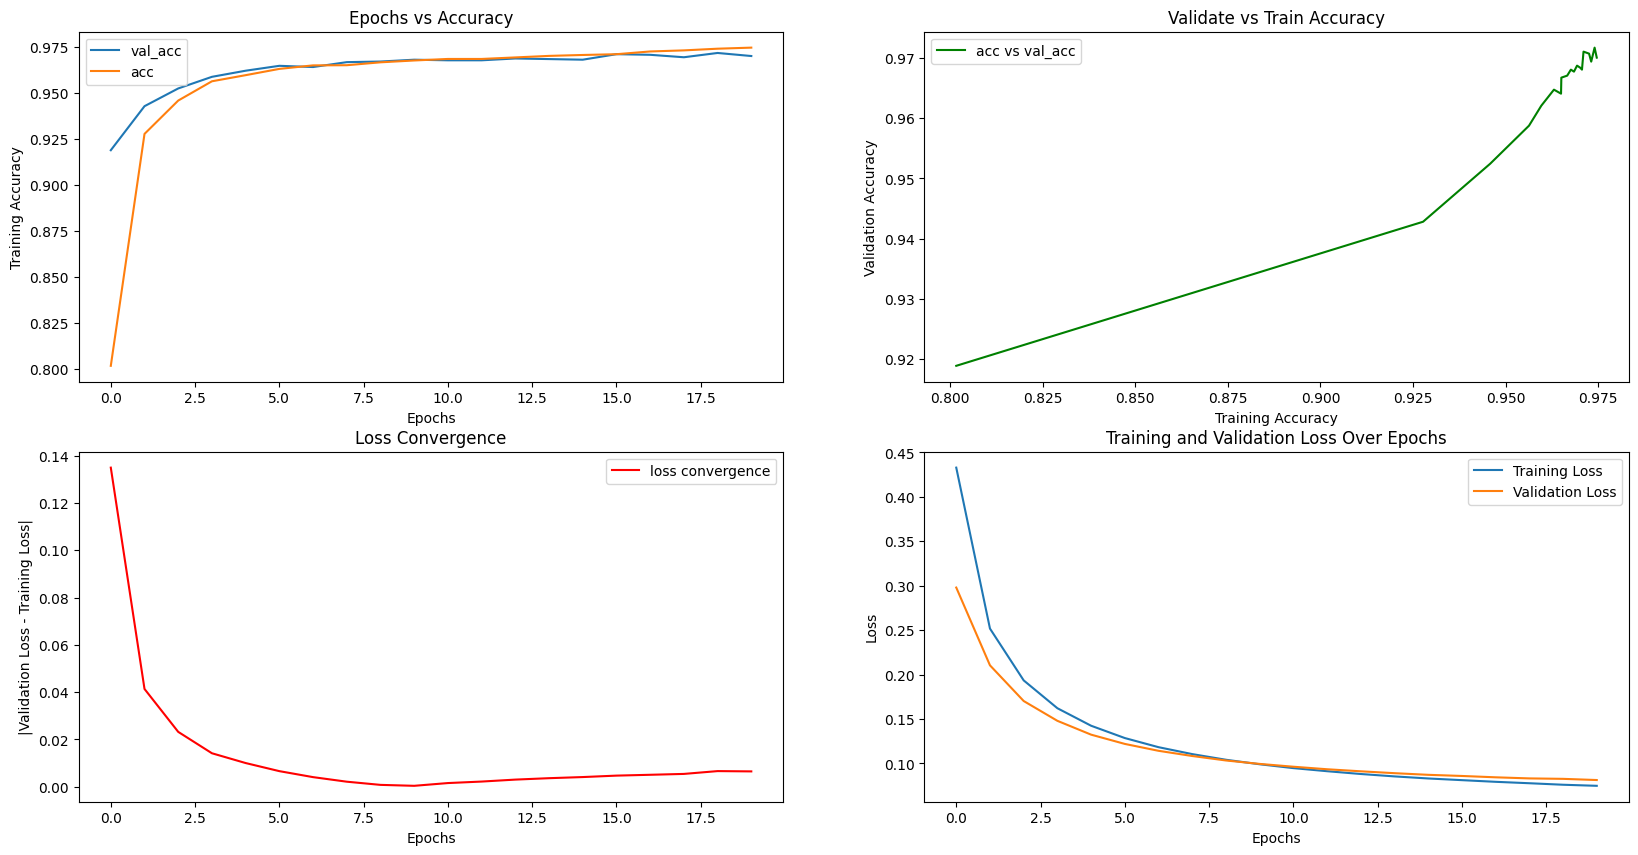

Neurons,layers : 30,1
Epoch 1/20
376/376 [==============================] - 2s 5ms/step - loss: 0.4587 - accuracy: 0.7889 - val_loss: 0.2958 - val_accuracy: 0.9129
Epoch 2/20
376/376 [==============================] - 2s 4ms/step - loss: 0.2544 - accuracy: 0.9256 - val_loss: 0.1869 - val_accuracy: 0.9445
Epoch 3/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1888 - accuracy: 0.9454 - val_loss: 0.1445 - val_accuracy: 0.9554
Epoch 4/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1534 - accuracy: 0.9568 - val_loss: 0.1212 - val_accuracy: 0.9638
Epoch 5/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1297 - accuracy: 0.9613 - val_loss: 0.1078 - val_accuracy: 0.9674
Epoch 6/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1155 - accuracy: 0.9654 - val_loss: 0.0993 - val_accuracy: 0.9681
Epoch 7/20
376/376 [==============================] - 2s 6ms/step - loss: 0.1085 - accuracy: 0.9652 - val_loss: 0.0934 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


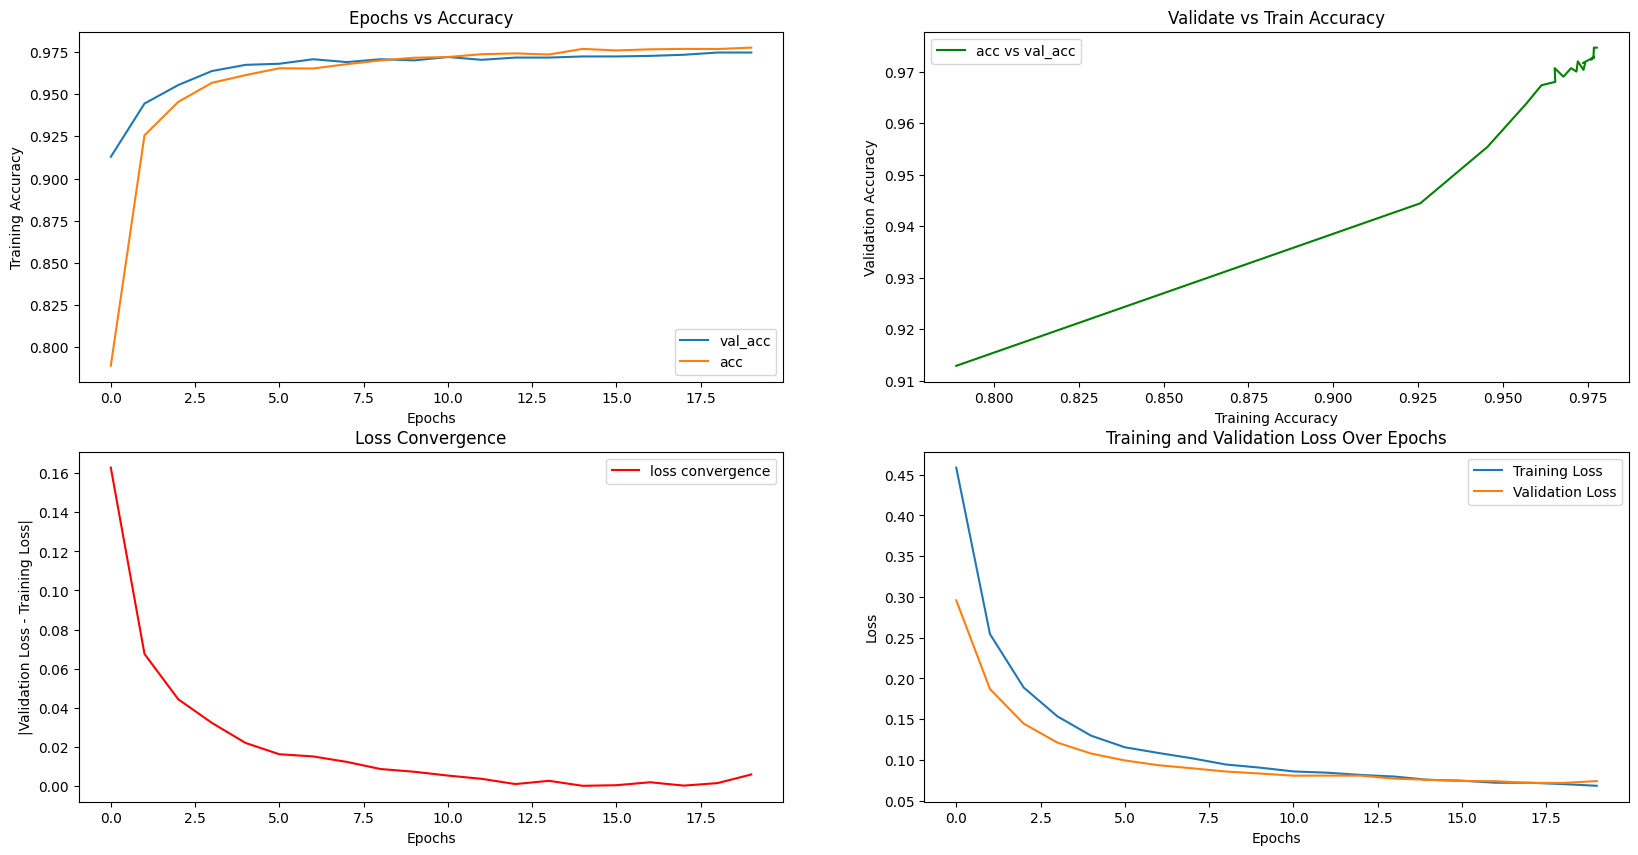

Neurons,layers : 35,0
Epoch 1/20
376/376 [==============================] - 3s 5ms/step - loss: 0.4121 - accuracy: 0.8464 - val_loss: 0.2835 - val_accuracy: 0.9228
Epoch 2/20
376/376 [==============================] - 2s 4ms/step - loss: 0.2440 - accuracy: 0.9301 - val_loss: 0.2045 - val_accuracy: 0.9435
Epoch 3/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1905 - accuracy: 0.9438 - val_loss: 0.1680 - val_accuracy: 0.9501
Epoch 4/20
376/376 [==============================] - 1s 4ms/step - loss: 0.1614 - accuracy: 0.9524 - val_loss: 0.1463 - val_accuracy: 0.9541
Epoch 5/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1426 - accuracy: 0.9586 - val_loss: 0.1319 - val_accuracy: 0.9584
Epoch 6/20
376/376 [==============================] - 2s 6ms/step - loss: 0.1294 - accuracy: 0.9613 - val_loss: 0.1217 - val_accuracy: 0.9634
Epoch 7/20
376/376 [==============================] - 2s 6ms/step - loss: 0.1193 - accuracy: 0.9618 - val_loss: 0.1139 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


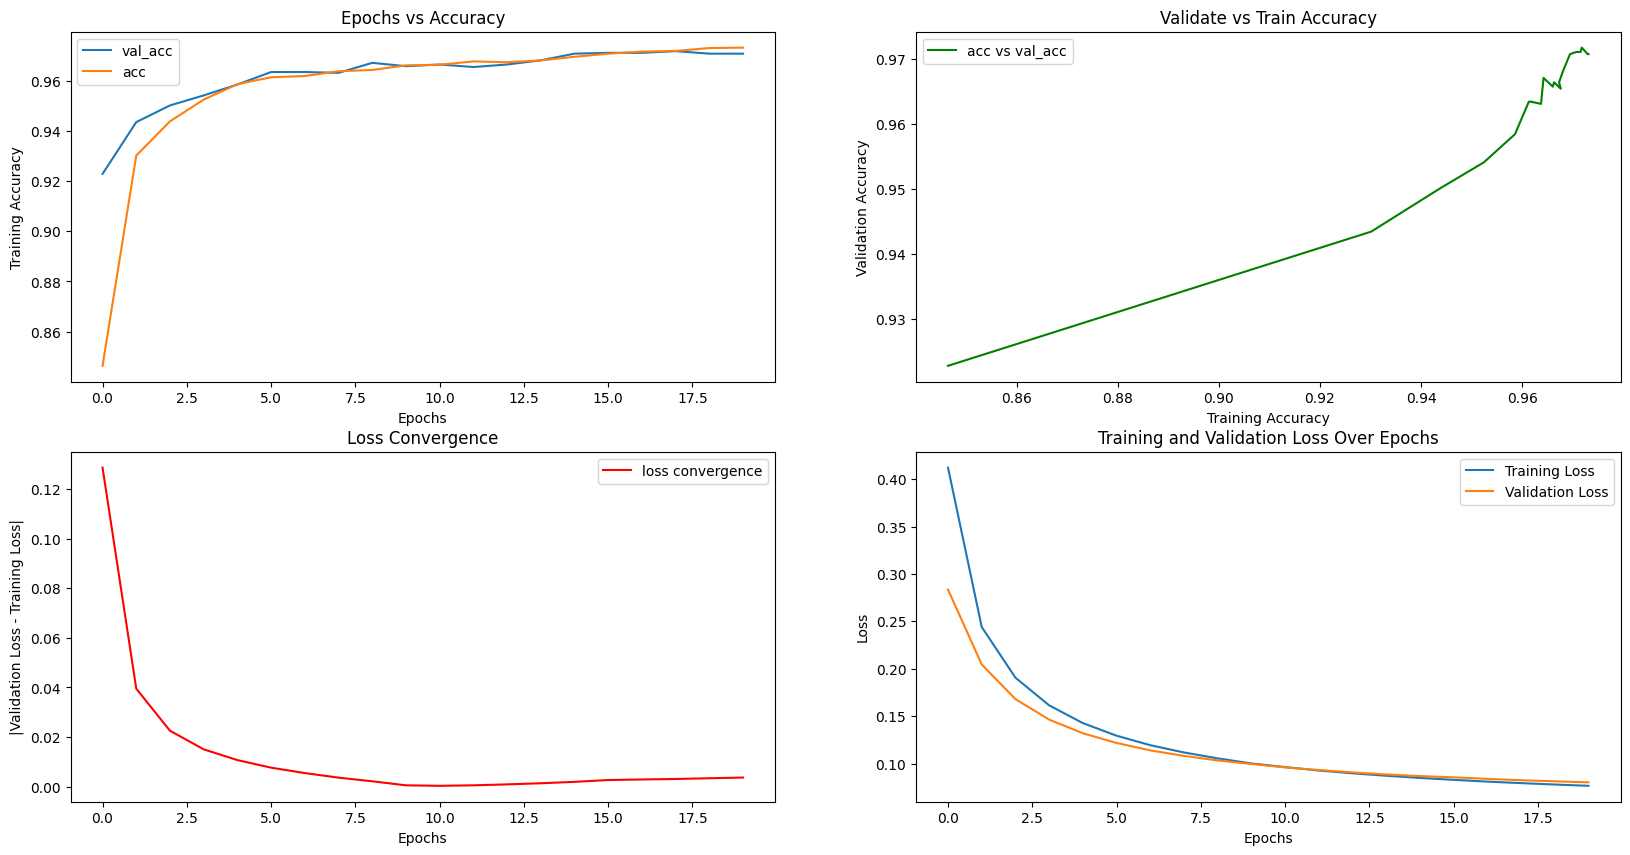

Neurons,layers : 35,1
Epoch 1/20
376/376 [==============================] - 3s 7ms/step - loss: 0.4902 - accuracy: 0.7759 - val_loss: 0.3167 - val_accuracy: 0.9222
Epoch 2/20
376/376 [==============================] - 3s 7ms/step - loss: 0.2660 - accuracy: 0.9202 - val_loss: 0.1949 - val_accuracy: 0.9458
Epoch 3/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1923 - accuracy: 0.9415 - val_loss: 0.1485 - val_accuracy: 0.9561
Epoch 4/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1538 - accuracy: 0.9503 - val_loss: 0.1238 - val_accuracy: 0.9634
Epoch 5/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1311 - accuracy: 0.9587 - val_loss: 0.1096 - val_accuracy: 0.9628
Epoch 6/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1162 - accuracy: 0.9634 - val_loss: 0.1010 - val_accuracy: 0.9674
Epoch 7/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1063 - accuracy: 0.9647 - val_loss: 0.0939 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


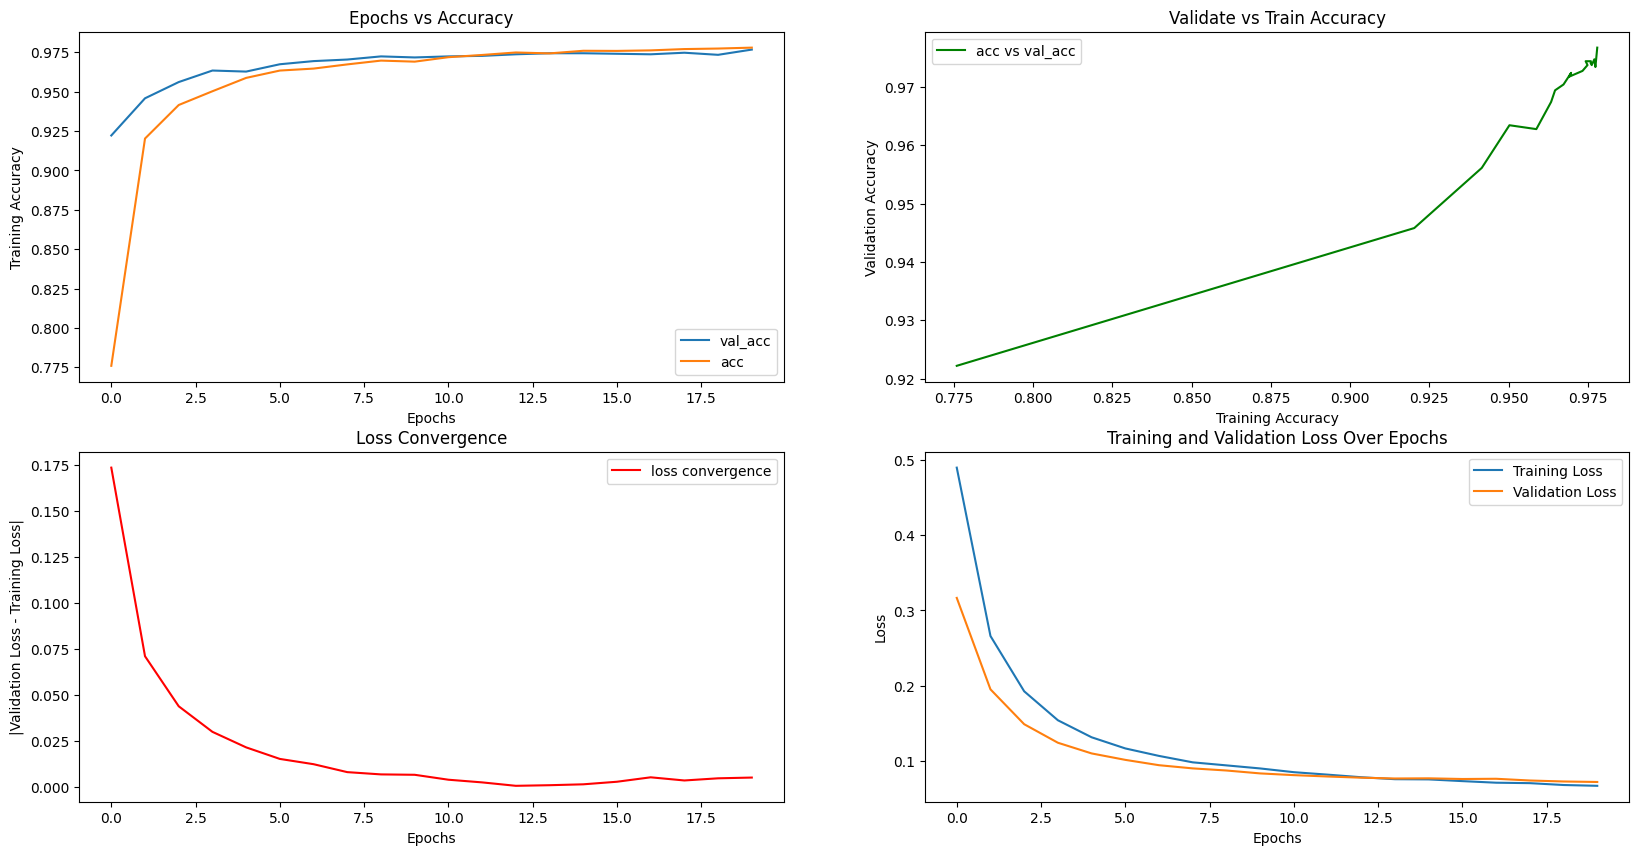

Neurons,layers : 40,0
Epoch 1/20
376/376 [==============================] - 3s 5ms/step - loss: 0.3958 - accuracy: 0.8571 - val_loss: 0.2781 - val_accuracy: 0.9209
Epoch 2/20
376/376 [==============================] - 3s 7ms/step - loss: 0.2386 - accuracy: 0.9294 - val_loss: 0.2007 - val_accuracy: 0.9411
Epoch 3/20
376/376 [==============================] - 2s 6ms/step - loss: 0.1863 - accuracy: 0.9446 - val_loss: 0.1648 - val_accuracy: 0.9548
Epoch 4/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1579 - accuracy: 0.9527 - val_loss: 0.1437 - val_accuracy: 0.9598
Epoch 5/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1392 - accuracy: 0.9580 - val_loss: 0.1296 - val_accuracy: 0.9624
Epoch 6/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1262 - accuracy: 0.9617 - val_loss: 0.1196 - val_accuracy: 0.9651
Epoch 7/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1165 - accuracy: 0.9632 - val_loss: 0.1121 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


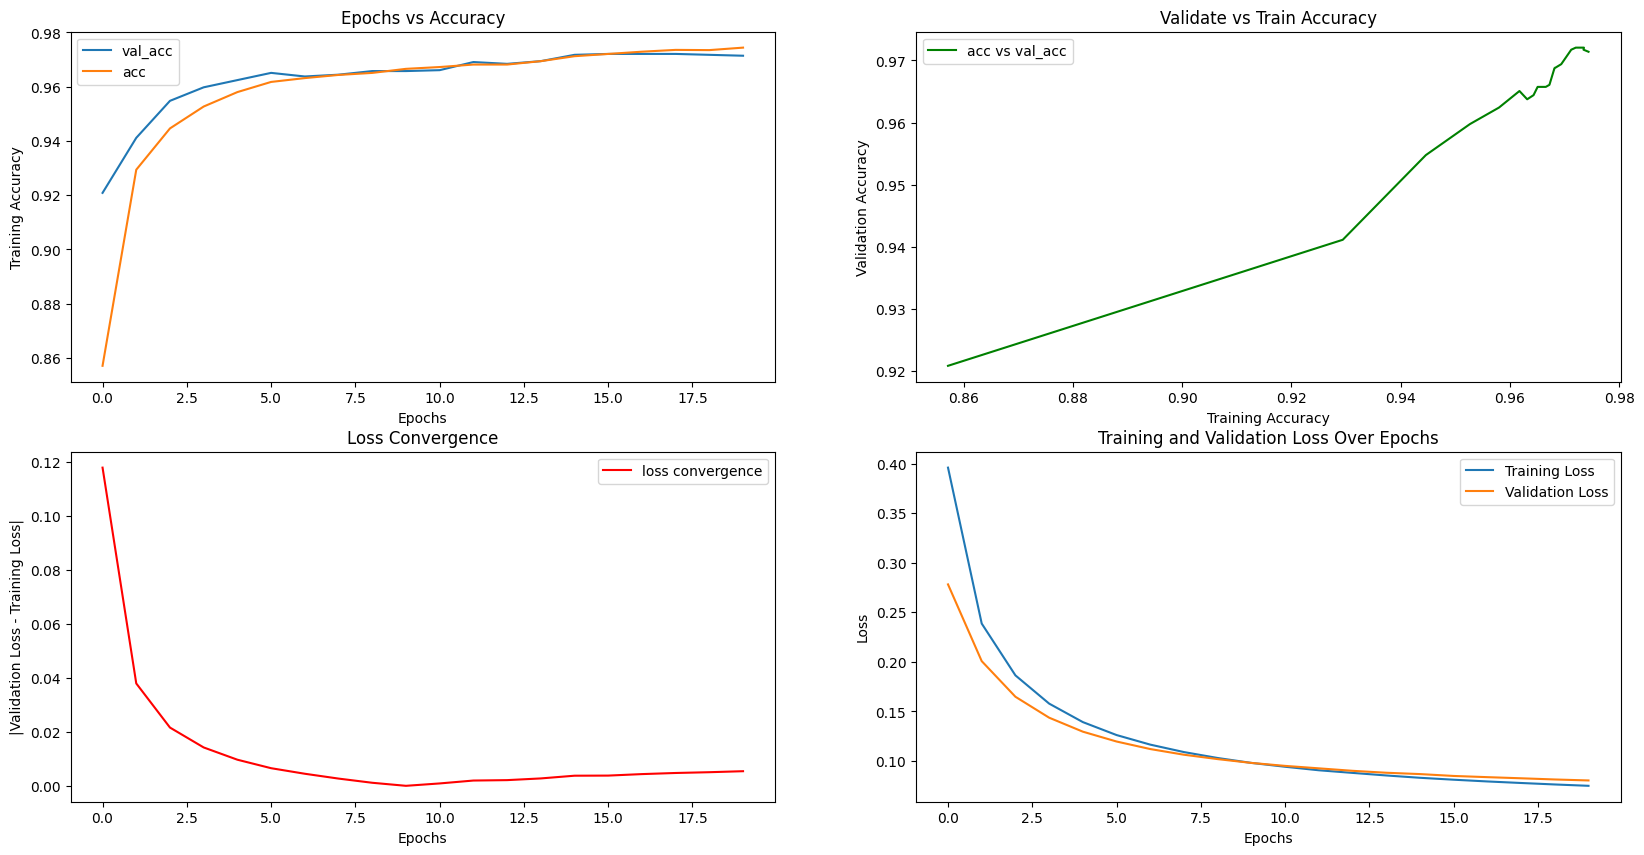

Neurons,layers : 40,1
Epoch 1/20
376/376 [==============================] - 3s 6ms/step - loss: 0.4278 - accuracy: 0.8090 - val_loss: 0.2680 - val_accuracy: 0.9232
Epoch 2/20
376/376 [==============================] - 2s 5ms/step - loss: 0.2383 - accuracy: 0.9241 - val_loss: 0.1801 - val_accuracy: 0.9438
Epoch 3/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1801 - accuracy: 0.9430 - val_loss: 0.1421 - val_accuracy: 0.9504
Epoch 4/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1485 - accuracy: 0.9528 - val_loss: 0.1221 - val_accuracy: 0.9588
Epoch 5/20
376/376 [==============================] - 2s 7ms/step - loss: 0.1294 - accuracy: 0.9579 - val_loss: 0.1106 - val_accuracy: 0.9611
Epoch 6/20
376/376 [==============================] - 2s 6ms/step - loss: 0.1157 - accuracy: 0.9621 - val_loss: 0.1002 - val_accuracy: 0.9664
Epoch 7/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1061 - accuracy: 0.9652 - val_loss: 0.0943 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


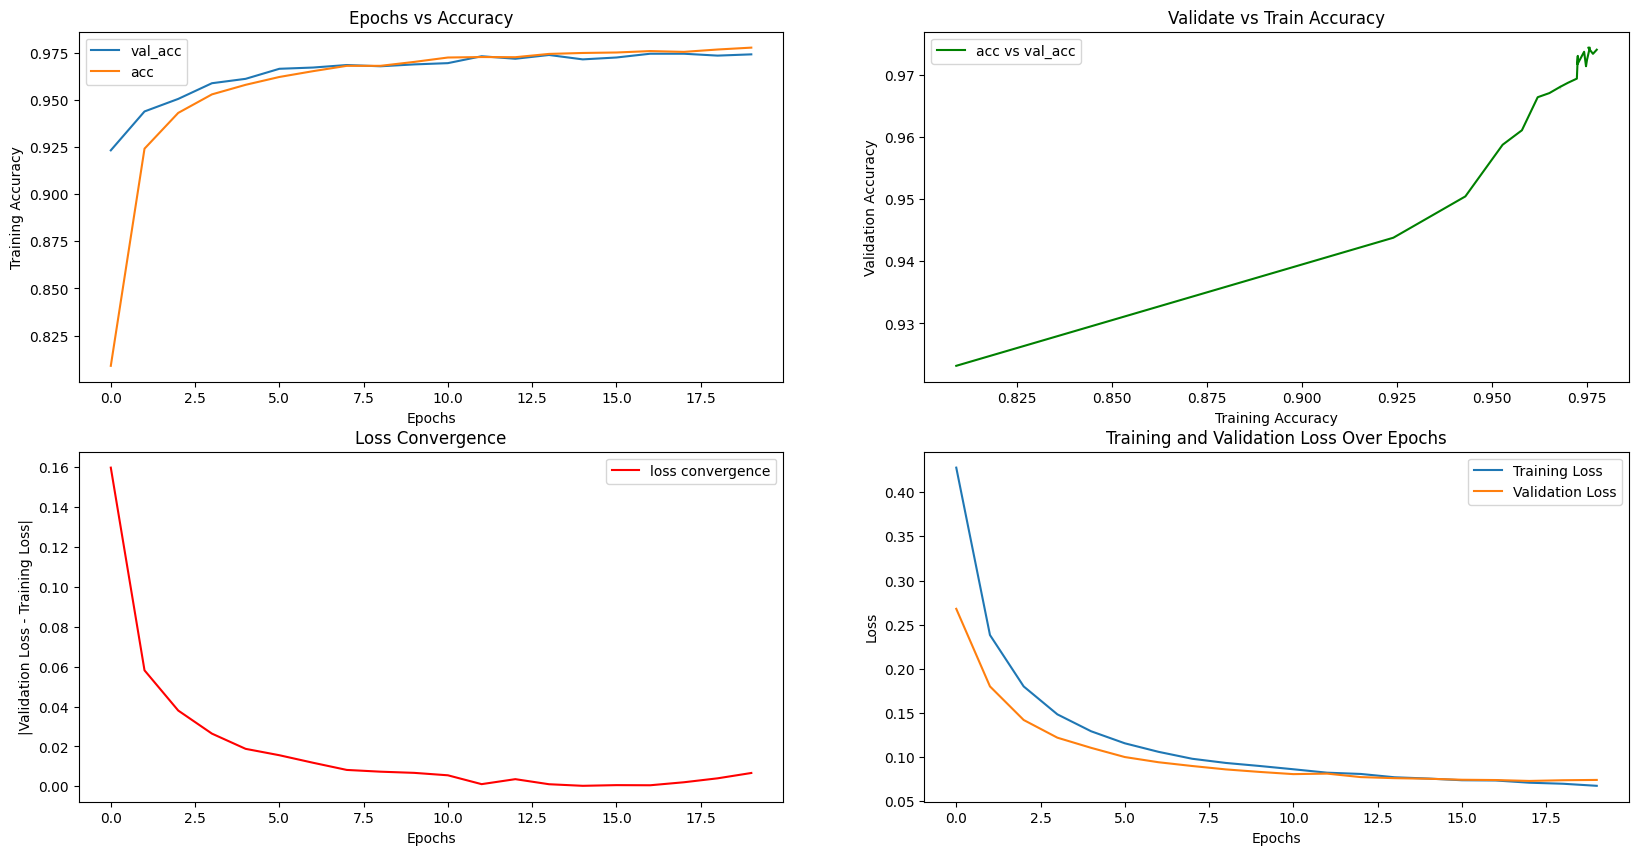

Neurons,layers : 50,0
Epoch 1/20
376/376 [==============================] - 3s 6ms/step - loss: 0.4087 - accuracy: 0.8599 - val_loss: 0.2759 - val_accuracy: 0.9262
Epoch 2/20
376/376 [==============================] - 2s 4ms/step - loss: 0.2325 - accuracy: 0.9344 - val_loss: 0.1976 - val_accuracy: 0.9425
Epoch 3/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1817 - accuracy: 0.9469 - val_loss: 0.1643 - val_accuracy: 0.9541
Epoch 4/20
376/376 [==============================] - 2s 4ms/step - loss: 0.1550 - accuracy: 0.9554 - val_loss: 0.1451 - val_accuracy: 0.9534
Epoch 5/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1378 - accuracy: 0.9596 - val_loss: 0.1320 - val_accuracy: 0.9578
Epoch 6/20
376/376 [==============================] - 2s 6ms/step - loss: 0.1254 - accuracy: 0.9627 - val_loss: 0.1221 - val_accuracy: 0.9594
Epoch 7/20
376/376 [==============================] - 2s 6ms/step - loss: 0.1163 - accuracy: 0.9642 - val_loss: 0.1150 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


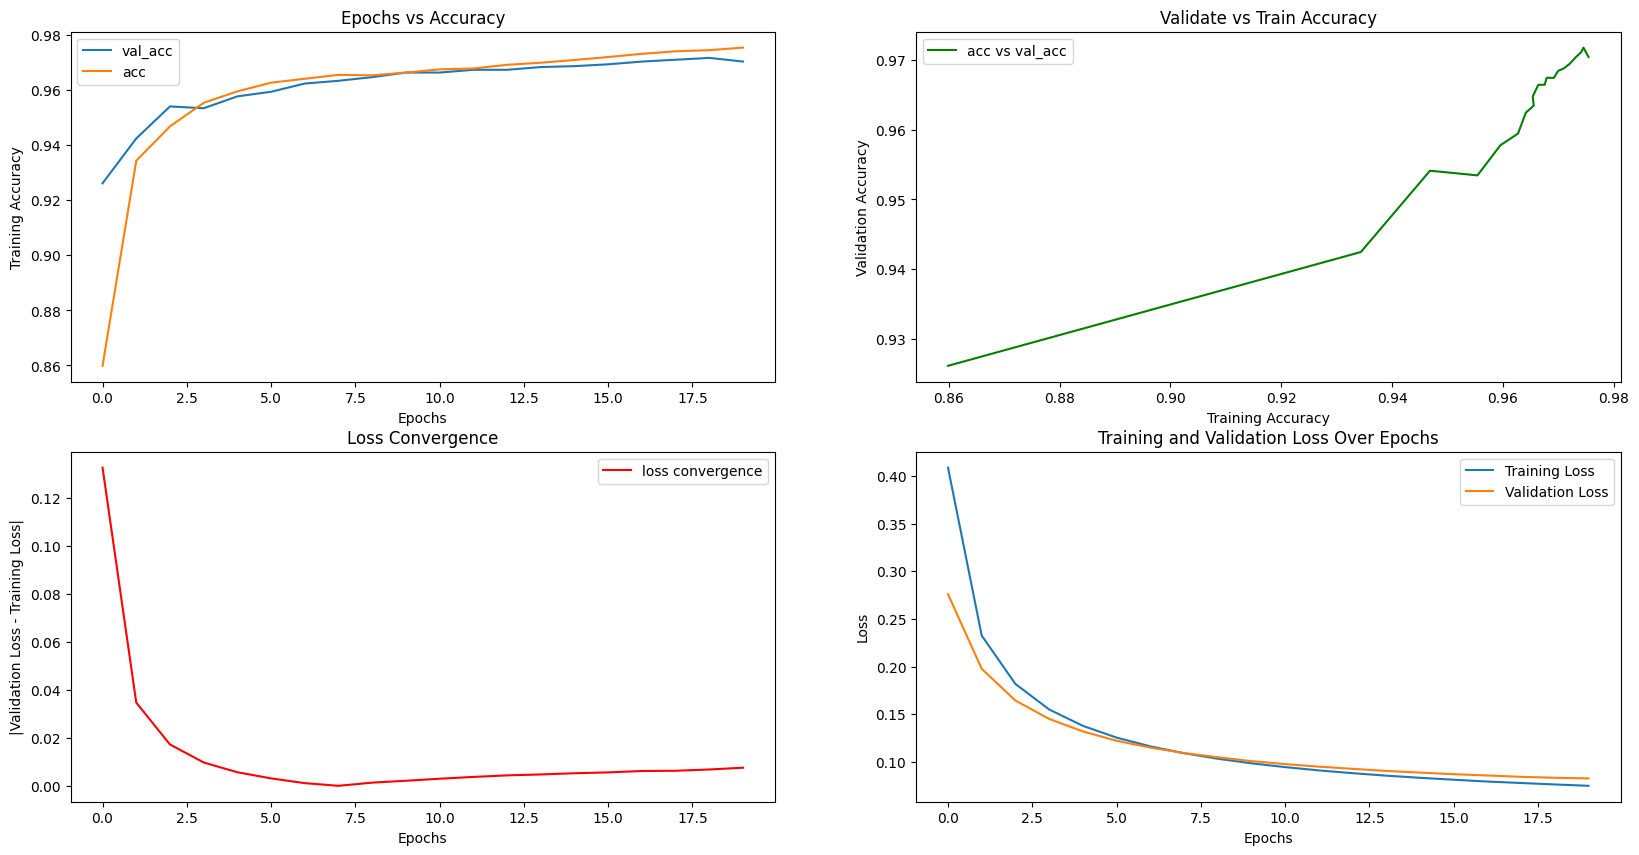

Neurons,layers : 50,1
Epoch 1/20
376/376 [==============================] - 3s 5ms/step - loss: 0.4046 - accuracy: 0.8492 - val_loss: 0.2369 - val_accuracy: 0.9318
Epoch 2/20
376/376 [==============================] - 2s 5ms/step - loss: 0.2132 - accuracy: 0.9374 - val_loss: 0.1614 - val_accuracy: 0.9488
Epoch 3/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1649 - accuracy: 0.9502 - val_loss: 0.1310 - val_accuracy: 0.9588
Epoch 4/20
376/376 [==============================] - 2s 5ms/step - loss: 0.1410 - accuracy: 0.9558 - val_loss: 0.1157 - val_accuracy: 0.9631
Epoch 5/20
376/376 [==============================] - 2s 6ms/step - loss: 0.1242 - accuracy: 0.9616 - val_loss: 0.1037 - val_accuracy: 0.9667
Epoch 6/20
376/376 [==============================] - 2s 6ms/step - loss: 0.1109 - accuracy: 0.9637 - val_loss: 0.0957 - val_accuracy: 0.9664
Epoch 7/20
376/376 [==============================] - 3s 7ms/step - loss: 0.1019 - accuracy: 0.9667 - val_loss: 0.0898 - val_a

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


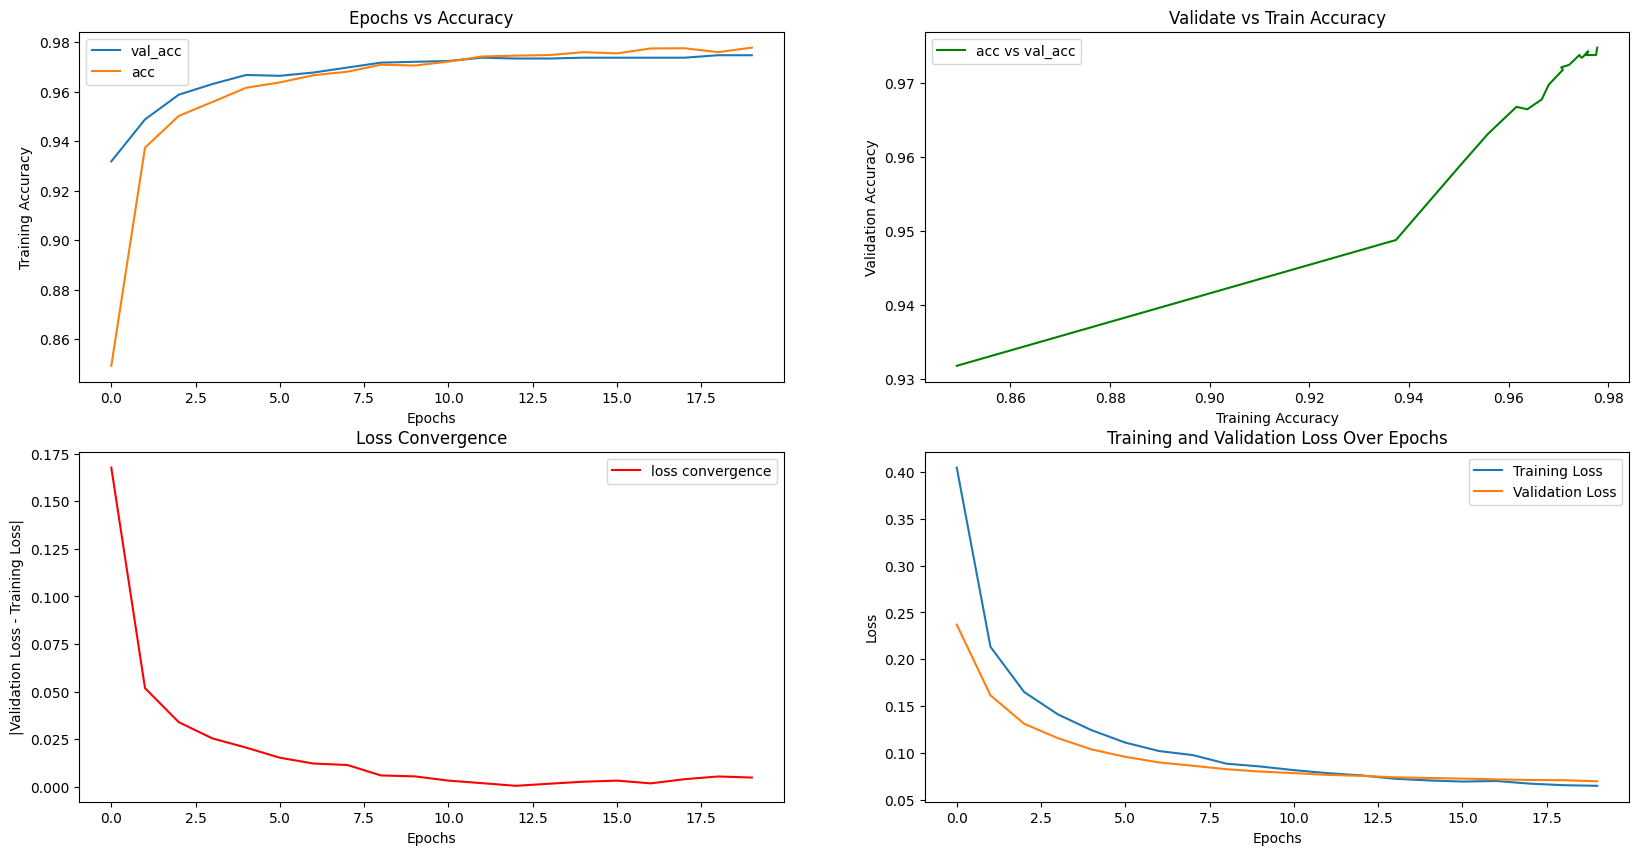

In [122]:
neurons = [10, 15, 20, 25, 30, 35, 40, 50]
layers = [0, 1]

for n_neurons in neurons:
    for n_layers in layers:
        model = build_model(n_neurons, n_layers)
        print(f'Neurons,layers : {n_neurons},{n_layers}')  # Define a function to build a model with specified parameters
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test,y_test))
        y_pred = (model.predict(X_test) > 0.5).astype(np.int32)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")
        plot_training_history(history)


Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_185 (Dense)           (None, 15)                3240      
                                                                 
 dropout_74 (Dropout)        (None, 15)                0         
                                                                 
 dense_186 (Dense)           (None, 15)                240       
                                                                 
 dropout_75 (Dropout)        (None, 15)                0         
                                                                 
 dense_187 (Dense)           (None, 1)                 16        
                                                                 
Total params: 3496 (13.66 KB)
Trainable params: 3496 (13.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
376/376

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


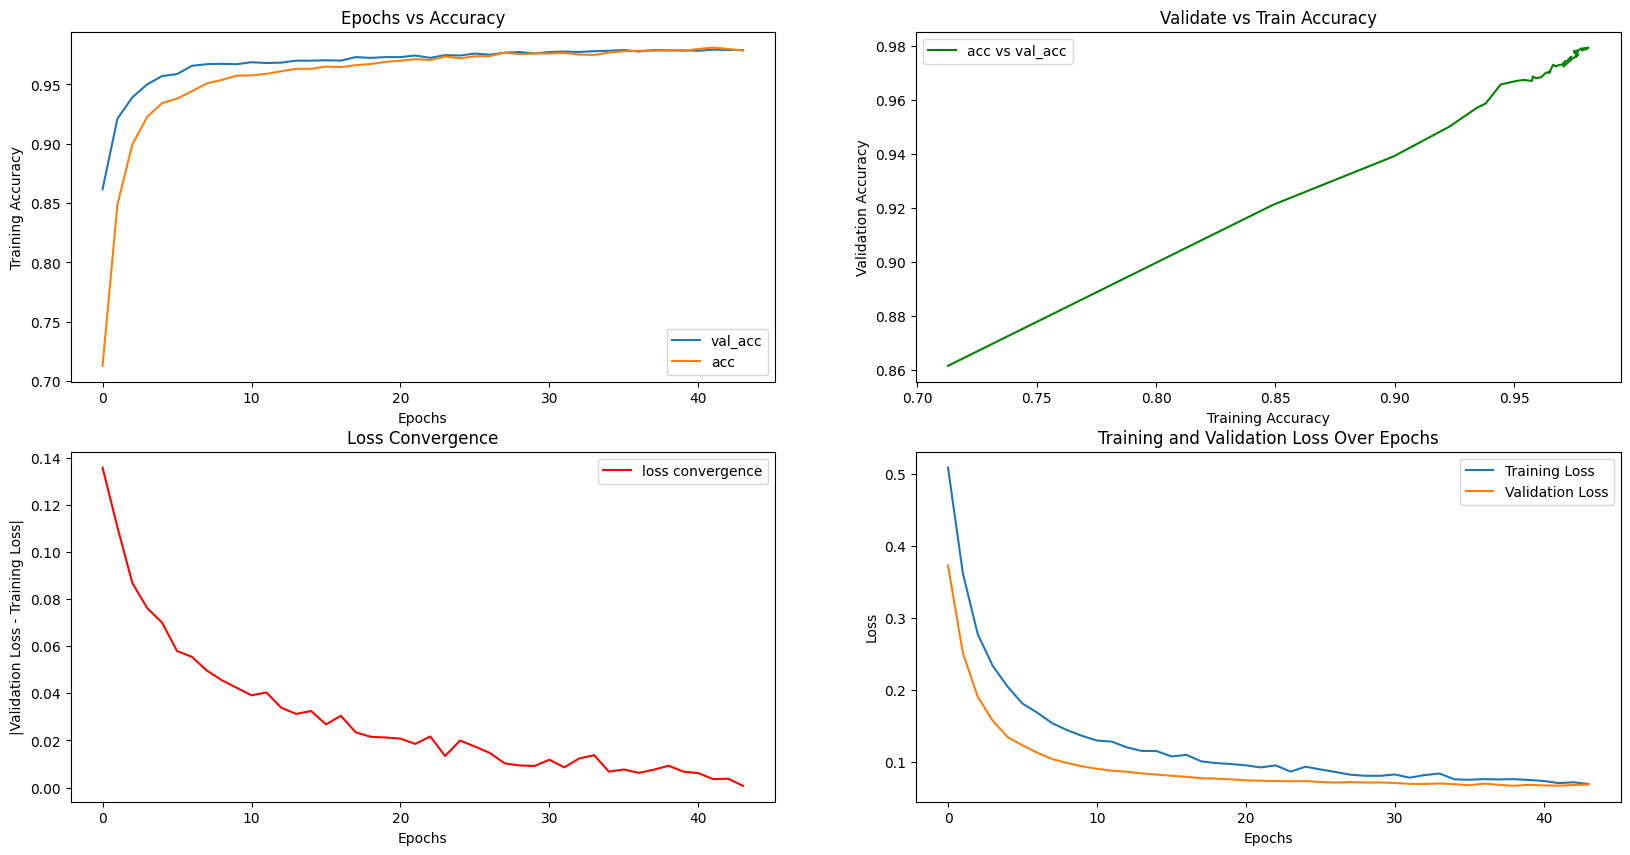

In [124]:
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential([
    Dense(15, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(15, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
batch_size = 32
epochs = 100
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test), callbacks=[early_stopping])
y_pred = (model.predict(X_test) > 0.5).astype(np.int32)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
plot_training_history(history)

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_194 (Dense)           (None, 25)                5400      
                                                                 
 dropout_80 (Dropout)        (None, 25)                0         
                                                                 
 dense_195 (Dense)           (None, 20)                520       
                                                                 
 dropout_81 (Dropout)        (None, 20)                0         
                                                                 
 dense_196 (Dense)           (None, 1)                 21        
                                                                 
Total params: 5941 (23.21 KB)
Trainable params: 5941 (23.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
376/376

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


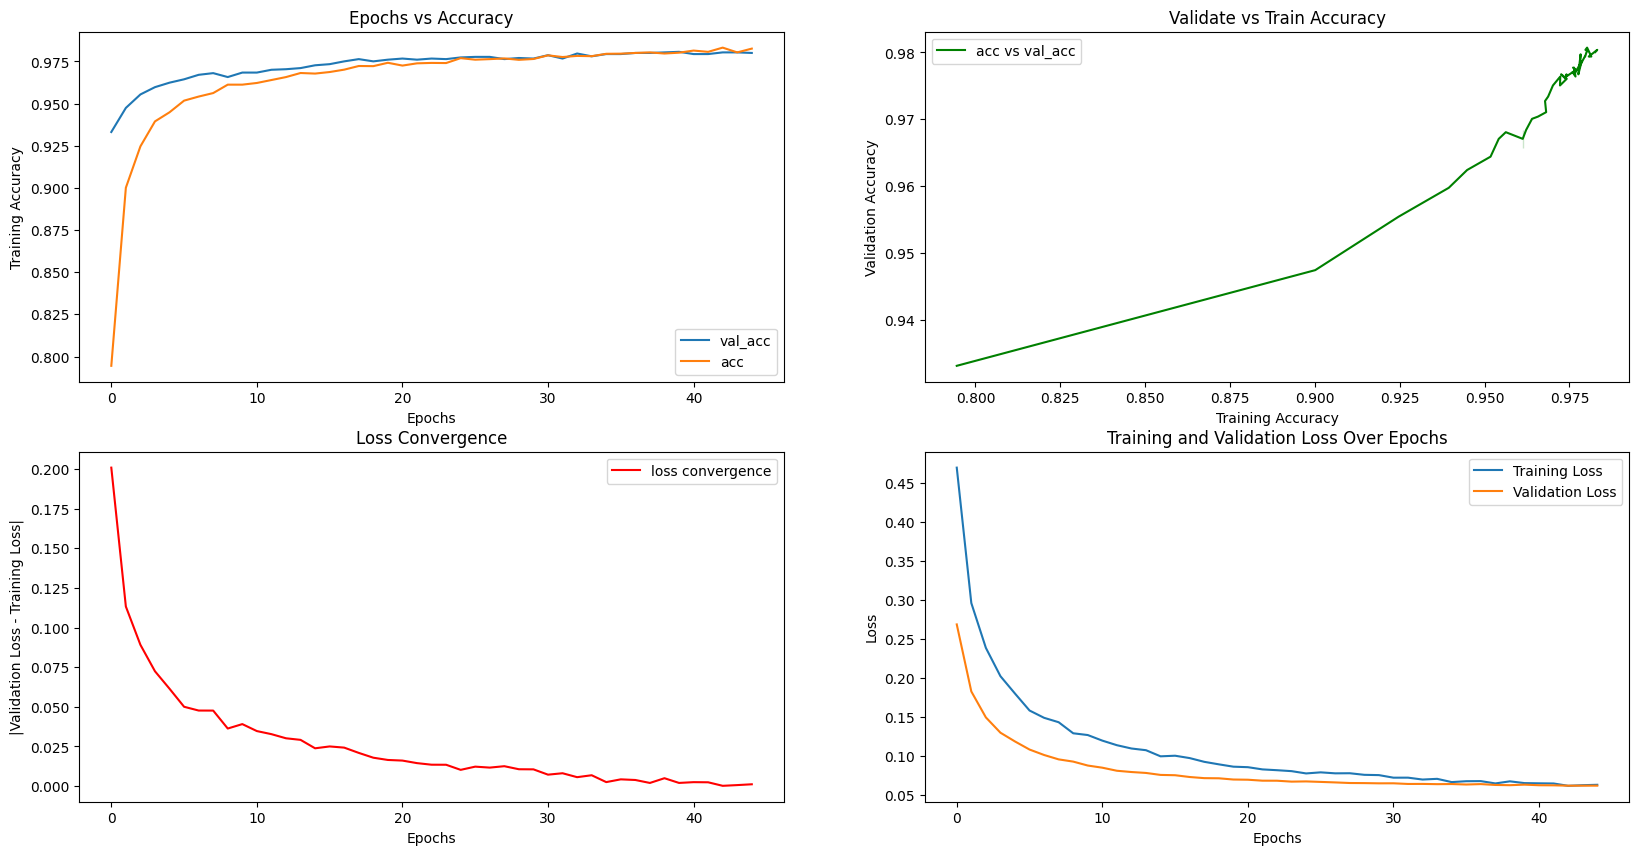

In [127]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(25, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(20, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
batch_size = 32
epochs = 100
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test), callbacks=[early_stopping])
y_pred = (model.predict(X_test) > 0.5).astype(np.int32)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
plot_training_history(history)

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_215 (Dense)           (None, 50)                10800     
                                                                 
 dropout_95 (Dropout)        (None, 50)                0         
                                                                 
 dense_216 (Dense)           (None, 50)                2550      
                                                                 
 dropout_96 (Dropout)        (None, 50)                0         
                                                                 
 dense_217 (Dense)           (None, 1)                 51        
                                                                 
Total params: 13401 (52.35 KB)
Trainable params: 13401 (52.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
376/3

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


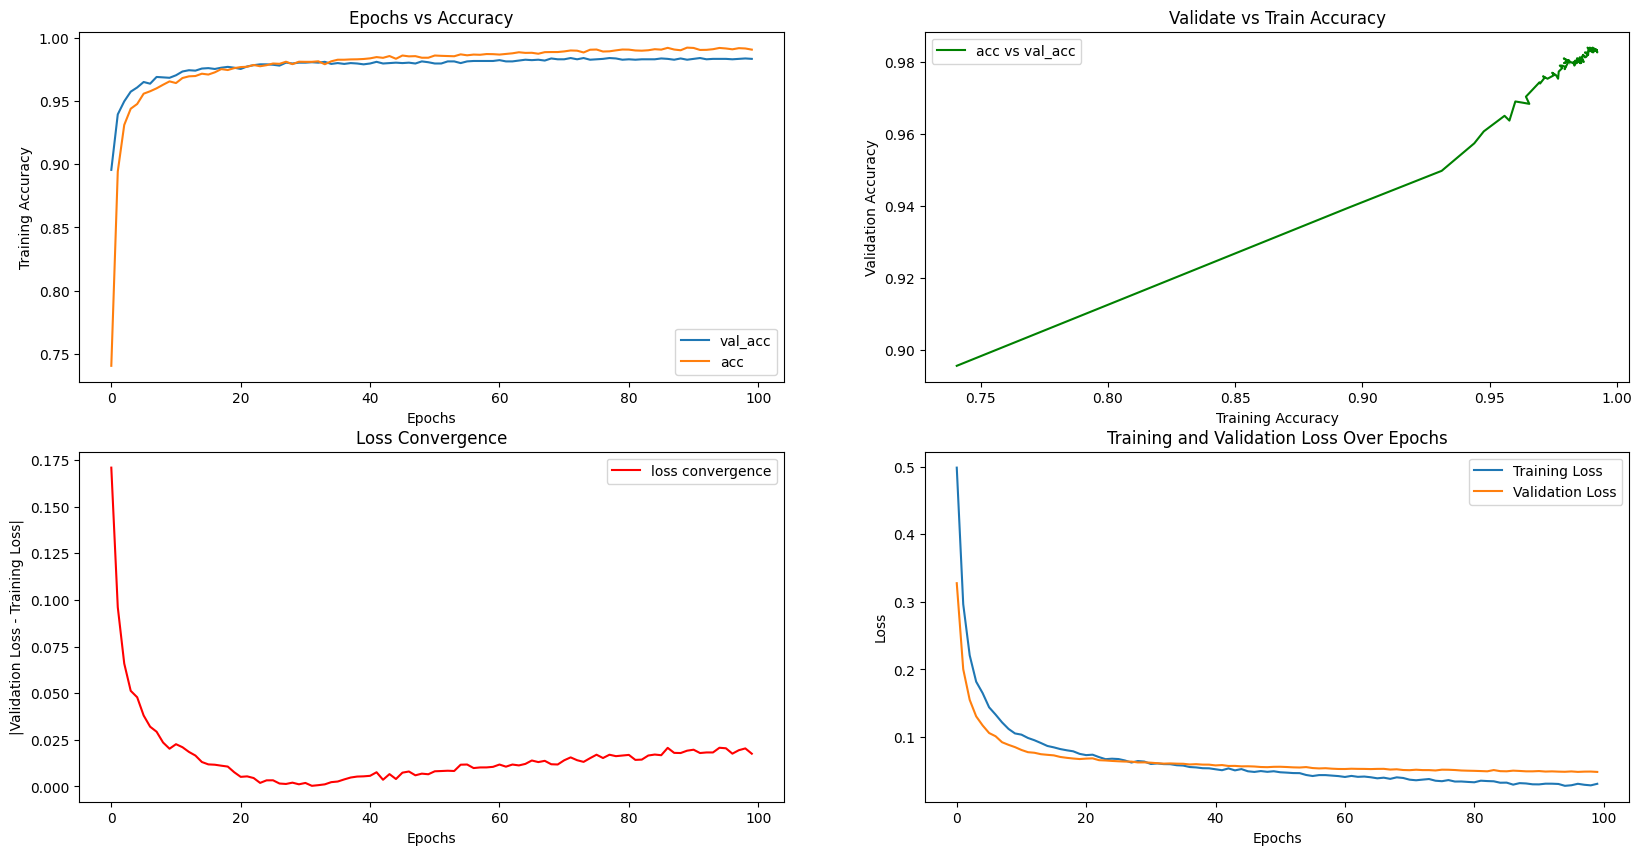

In [133]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
batch_size = 32
epochs = 50
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test,y_test))
y_pred = (model.predict(X_test) > 0.5).astype(np.int32)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
plot_training_history(history)

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_230 (Dense)           (None, 50)                10800     
                                                                 
 dropout_105 (Dropout)       (None, 50)                0         
                                                                 
 dense_231 (Dense)           (None, 50)                2550      
                                                                 
 dropout_106 (Dropout)       (None, 50)                0         
                                                                 
 dense_232 (Dense)           (None, 1)                 51        
                                                                 
Total params: 13401 (52.35 KB)
Trainable params: 13401 (52.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
376/37

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


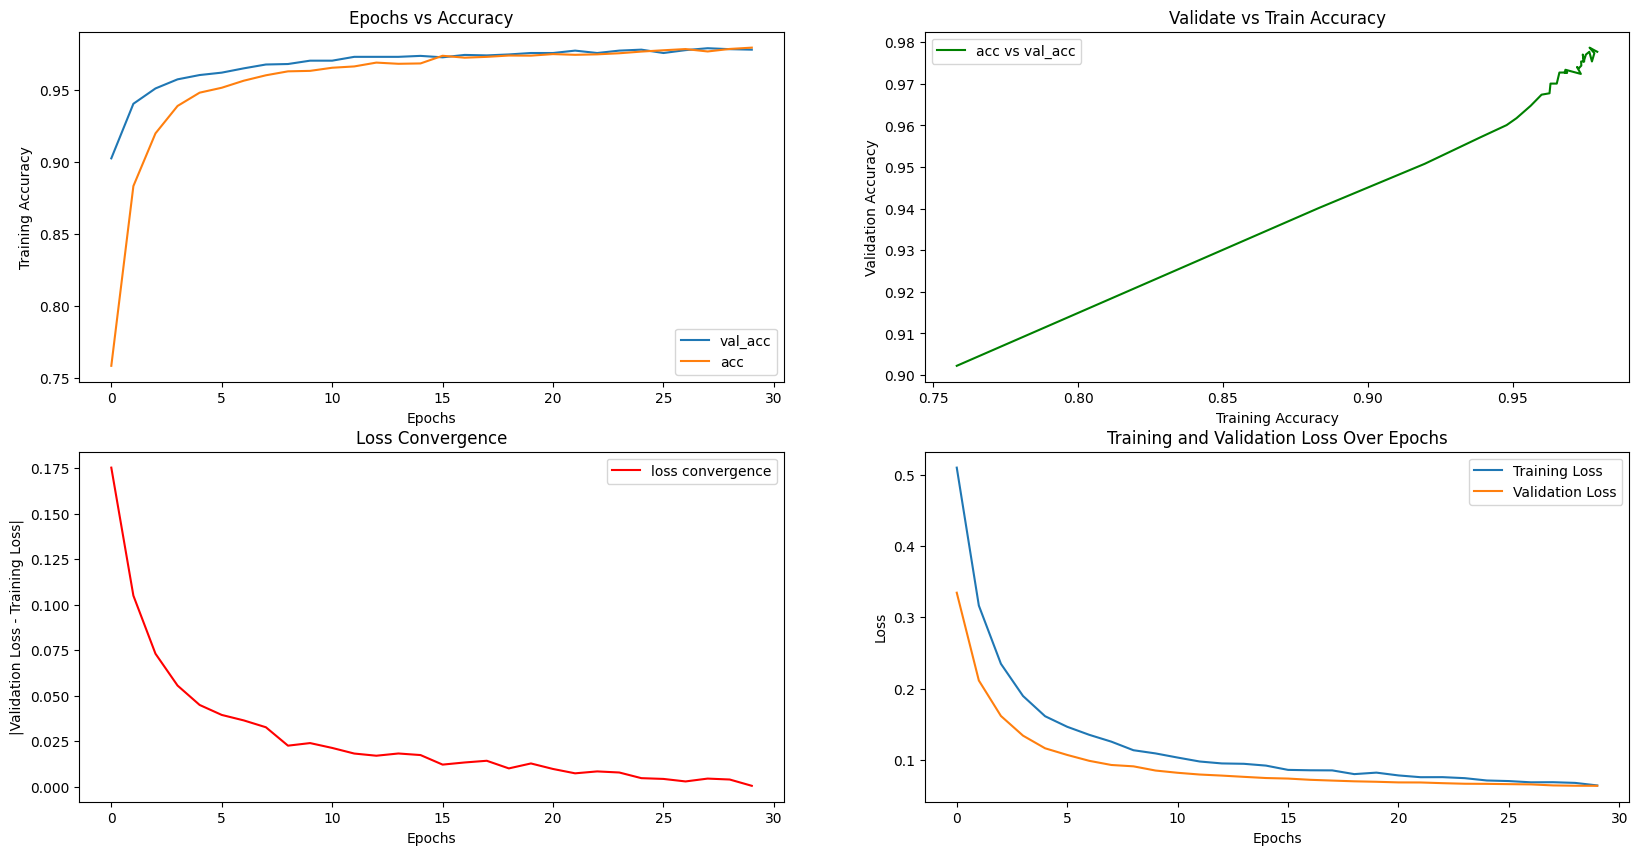

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1886
           1       0.97      0.97      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.98      0.98      0.98      3007
weighted avg       0.98      0.98      0.98      3007

[[1852   34]
 [  33 1088]]
0.4451017379760742


In [140]:
from tensorflow.keras.callbacks import LearningRateScheduler
import time
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        return lr * 0.9
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
batch_size = 32
epochs = 50
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test,y_test),callbacks=[lr_schedule])
st = time.time()
y_pred = (model.predict(X_test) > 0.5).astype(np.int32)
et = time.time()
tt = et-st
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
plot_training_history(history)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(tt)

Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_233 (Dense)           (None, 128)               27648     
                                                                 
 dropout_107 (Dropout)       (None, 128)               0         
                                                                 
 dense_234 (Dense)           (None, 64)                8256      
                                                                 
 dropout_108 (Dropout)       (None, 64)                0         
                                                                 
 dense_235 (Dense)           (None, 1)                 65        
                                                                 
Total params: 35969 (140.50 KB)
Trainable params: 35969 (140.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
376/

<ipython-input-87-177ec30b130d>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])), label='val_acc', palette='binary')
<ipython-input-87-177ec30b130d>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label='acc', palette='flare')
<ipython-input-87-177ec30b130d>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=h1['accuracy'], y=h1['val_accuracy'], label='acc vs val_acc', palette='binary', color='green', sort=False)


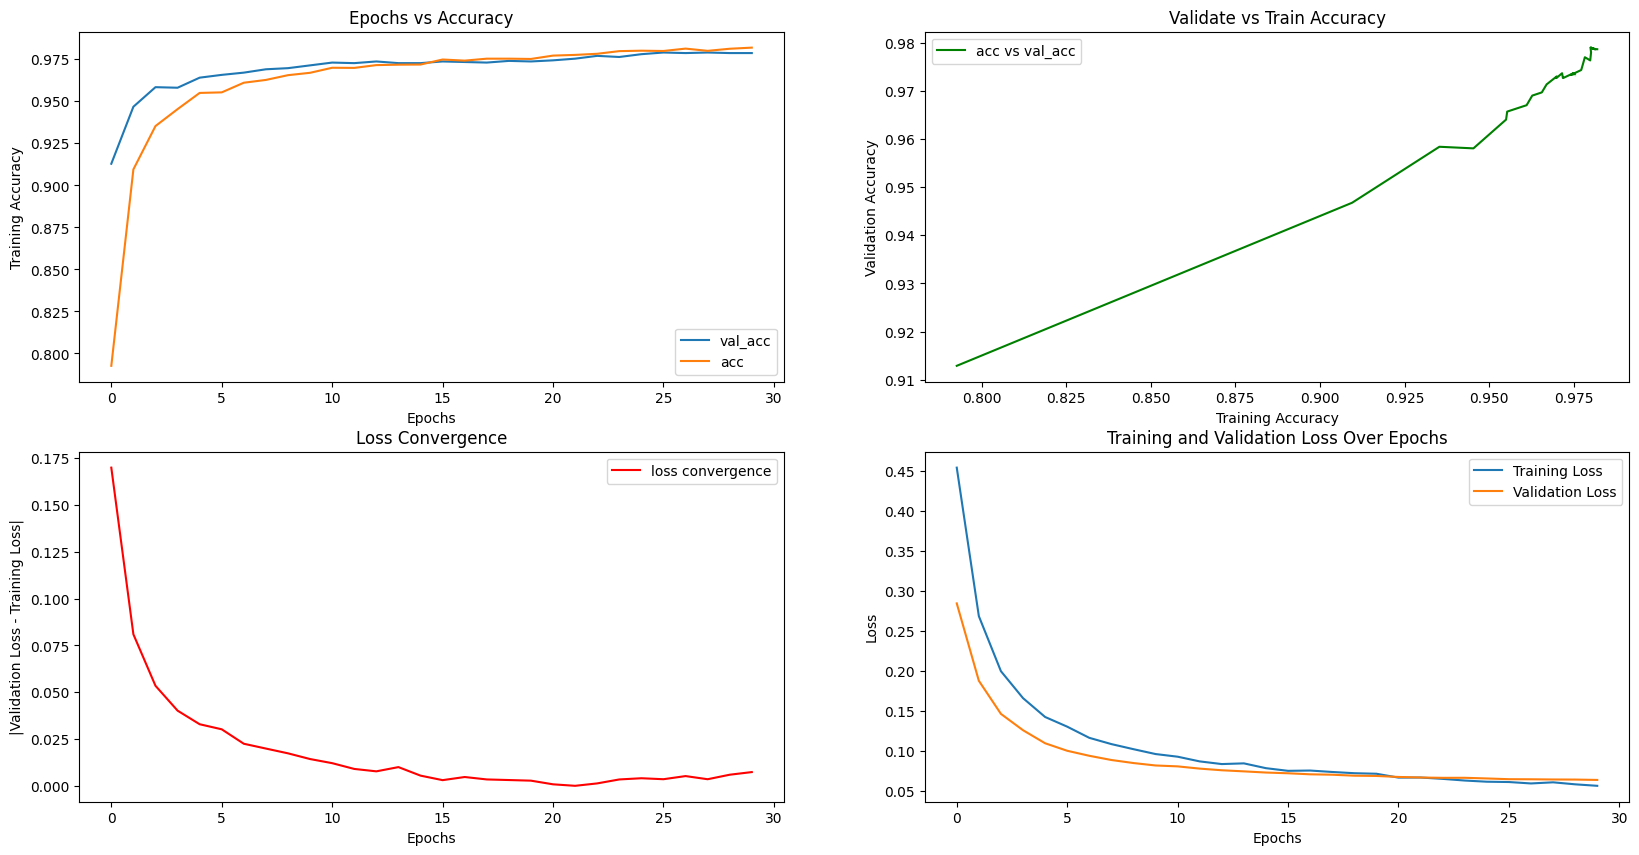

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1886
           1       0.97      0.97      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.98      0.98      0.98      3007
weighted avg       0.98      0.98      0.98      3007

[[1856   30]
 [  34 1087]]
0.44846653938293457


In [141]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        return lr * 0.9
    return lr

lr_schedule = LearningRateScheduler(lr_scheduler)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
batch_size = 32
epochs = 50
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test,y_test),callbacks=[lr_schedule])
st = time.time()
y_pred = (model.predict(X_test) > 0.5).astype(np.int32)
et = time.time()
tt = et-st
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
plot_training_history(history)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(tt)

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1886
           1       0.98      0.97      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.98      0.98      0.98      3007
weighted avg       0.98      0.98      0.98      3007



In [139]:
print(confusion_matrix(y_test,y_pred))

[[1862   24]
 [  37 1084]]
